In [1]:
pip install wandb scipy seaborn

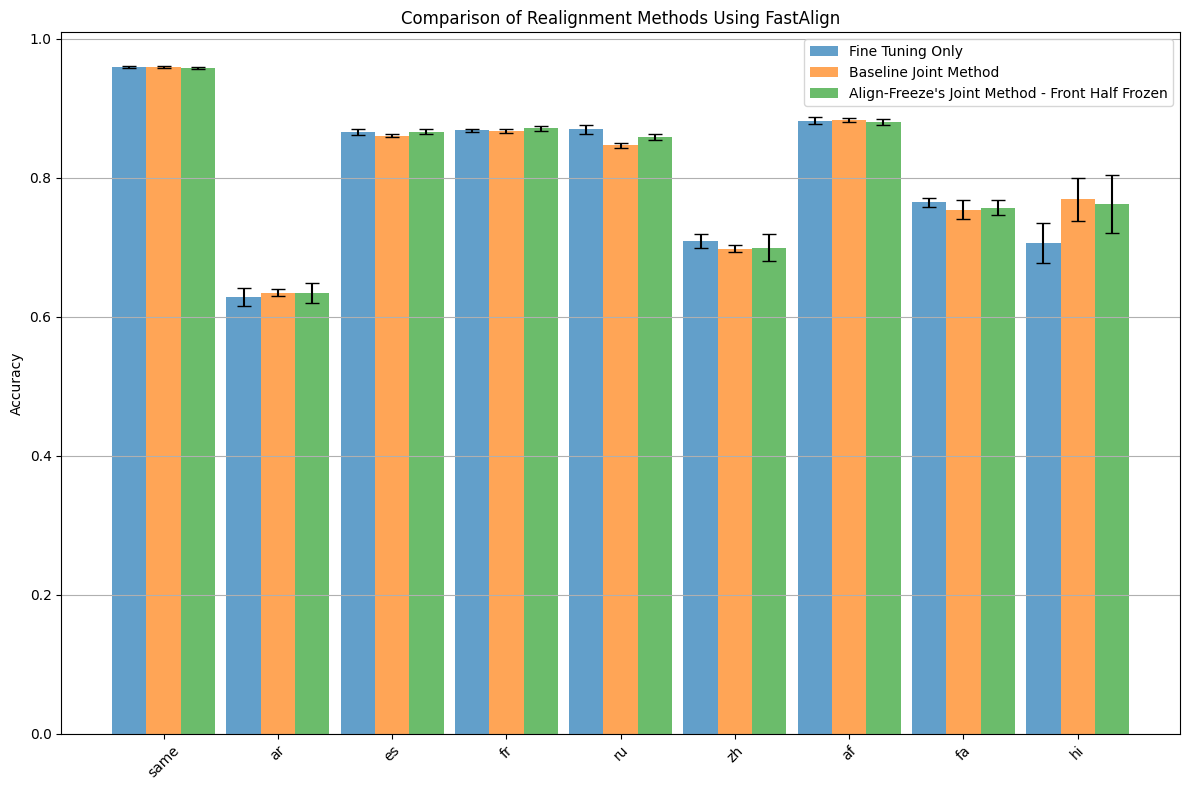

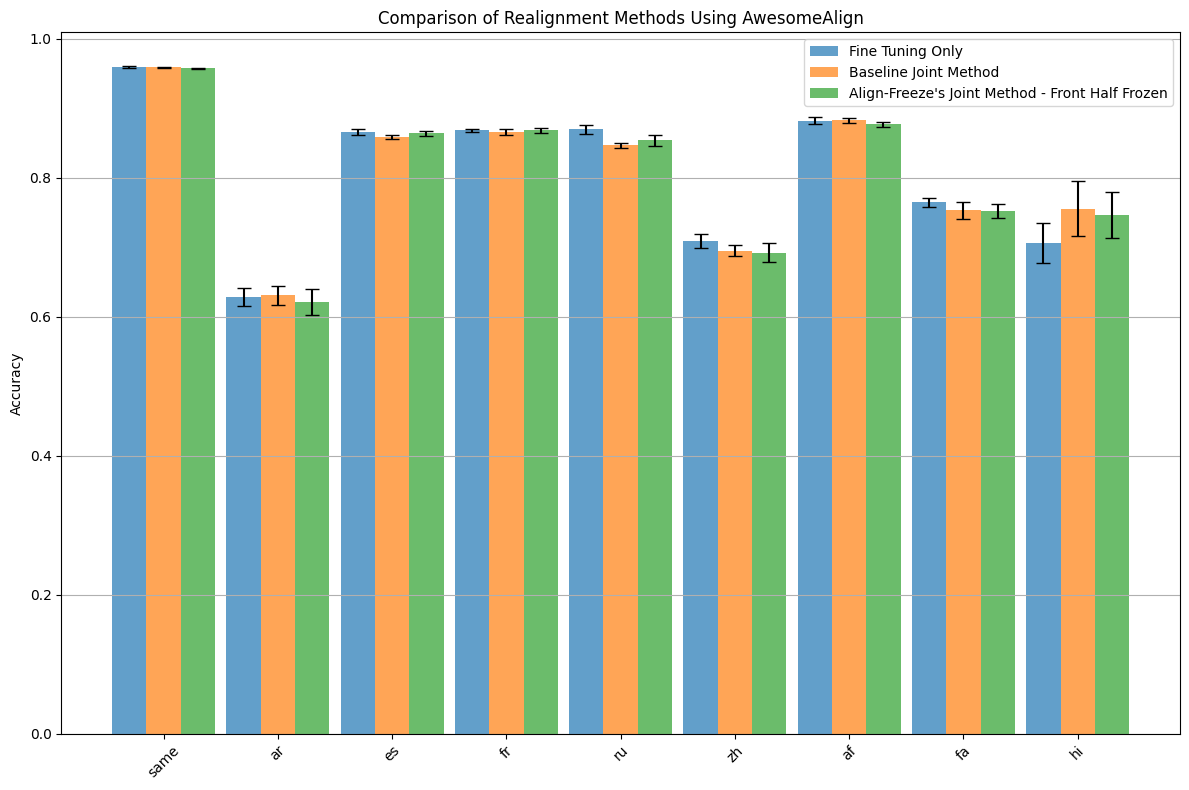

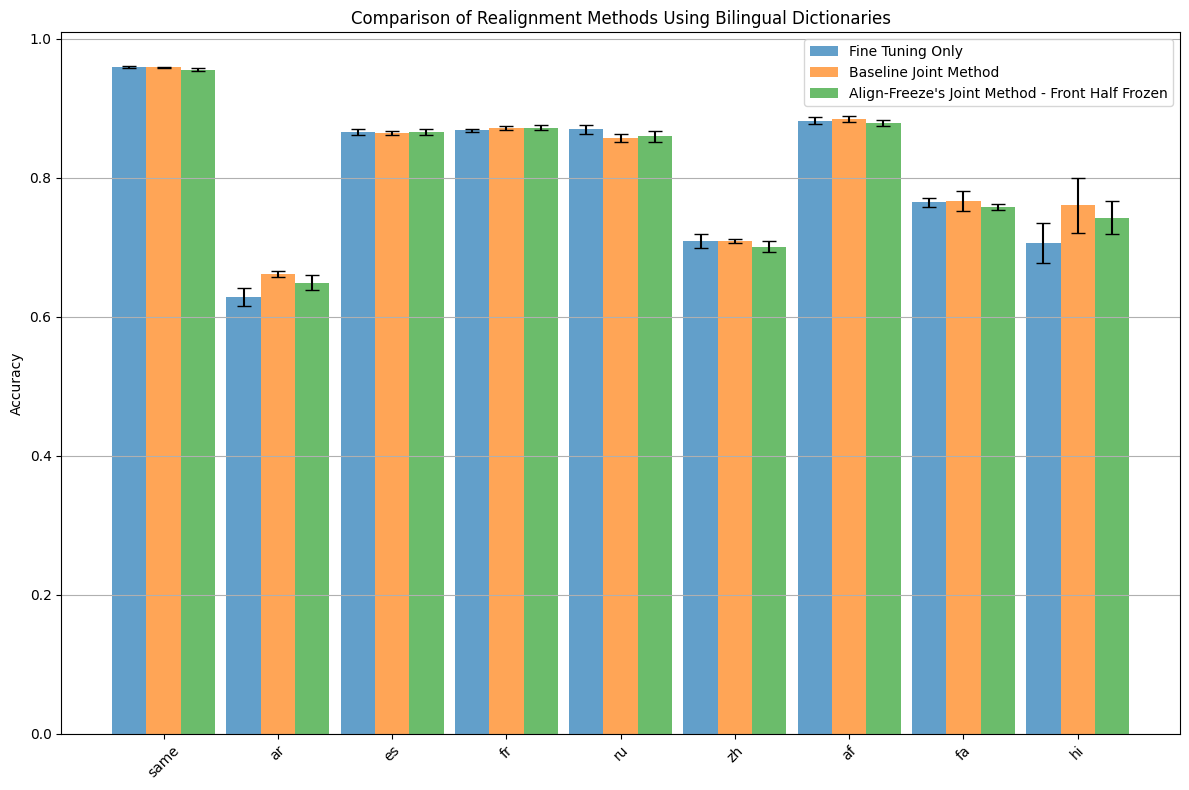

In [2]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


api = wandb.Api()


workspace = "align-freeze"


baseline_project_name = "3nl_baseline_udpos"


project_pairs = [
    ("3nl_during_fastalign_udpos", "3nl_during_partial_freeze_front_fastalign_udpos"),
    ("3nl_during_awesome_udpos", "3nl_during_partial_freeze_front_awesome_udpos"),
    ("3nl_during_dico_udpos", "3nl_during_partial_freeze_front_dico_udpos"),
]


langs = ["same", "ar", "es", "fr", "ru", "zh", "af", "fa", "hi"]


def fetch_and_process_runs(project, username="steven-bakos-ontechu"):
    runs_data = {lang: [] for lang in langs}
    runs = api.runs(f"{workspace}/{project}")
    for run in runs:
        if run.user.username == username:  
            for lang in langs:
                accuracy_key = f"eval_{lang}_accuracy"
                accuracy = run.summary.get(accuracy_key)
                if accuracy is not None:
                    runs_data[lang].append(accuracy)

    
    
    

    
    return runs_data

    
baseline_project_data = fetch_and_process_runs(baseline_project_name)


def plot_comparison(global_baseline_data, baseline_data, freezing_data, langs, global_baseline_name, baseline_name, freezing_name, global_baseline_title, baseline_title, new_method_title):
    width = 0.3  
    x = np.arange(len(langs))  

    fig, ax = plt.subplots(figsize=(12, 8))

    global_baseline_means = [np.mean(global_baseline_data[lang]) for lang in langs]
    global_baseline_cis = [scipy.stats.sem(global_baseline_data[lang]) * scipy.stats.t.ppf((1 + 0.95) / 2., len(global_baseline_data[lang])-1) if global_baseline_data[lang] else 0 for lang in langs]

    baseline_means = [np.mean(baseline_data[lang]) for lang in langs]
    baseline_cis = [scipy.stats.sem(baseline_data[lang]) * scipy.stats.t.ppf((1 + 0.95) / 2., len(baseline_data[lang])-1) if baseline_data[lang] else 0 for lang in langs]

    freezing_means = [np.mean(freezing_data[lang]) for lang in langs]
    freezing_cis = [scipy.stats.sem(freezing_data[lang]) * scipy.stats.t.ppf((1 + 0.95) / 2., len(freezing_data[lang])-1) if freezing_data[lang] else 0 for lang in langs]

    rects1 = ax.bar(x - width, global_baseline_means, width, yerr=global_baseline_cis, label=global_baseline_name, capsize=5, alpha=0.7, ecolor='black')
    rects2 = ax.bar(x, baseline_means, width, yerr=baseline_cis, label=baseline_name, capsize=5, alpha=0.7, ecolor='black')
    rects3 = ax.bar(x + width, freezing_means, width, yerr=freezing_cis, label=freezing_name, capsize=5, alpha=0.7, ecolor='black')

    ax.set_ylabel('Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(langs)
    aligner_name = baseline_name.split('_')[-2]
    if aligner_name == 'dico':
        aligner_name = 'Bilingual Dictionaries'
    elif aligner_name == 'awesome':
        aligner_name = 'AwesomeAlign'
    elif aligner_name == 'fastalign':
        aligner_name = 'FastAlign'
    ax.set_title(f"Comparison of Realignment Methods Using {aligner_name}")
    ax.legend([global_baseline_title, baseline_title, new_method_title])
    ax.yaxis.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for baseline_project, freezing_project in project_pairs:
    baseline_data = fetch_and_process_runs(baseline_project)
    freezing_data = fetch_and_process_runs(freezing_project)

    
    plot_comparison(baseline_project_data, baseline_data, freezing_data, langs, 'Global Baseline', baseline_project, freezing_project, 'Fine Tuning Only', "Baseline Joint Method", "Align-Freeze's Joint Method - Front Half Frozen")


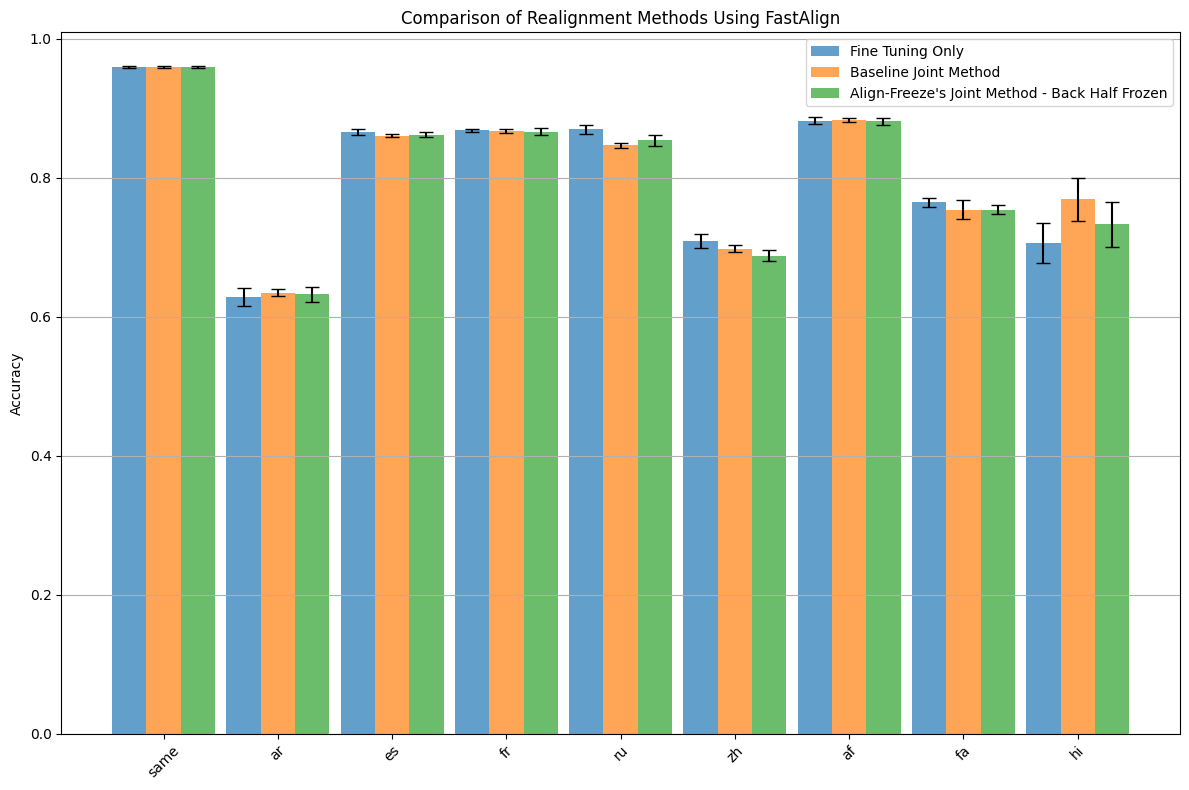

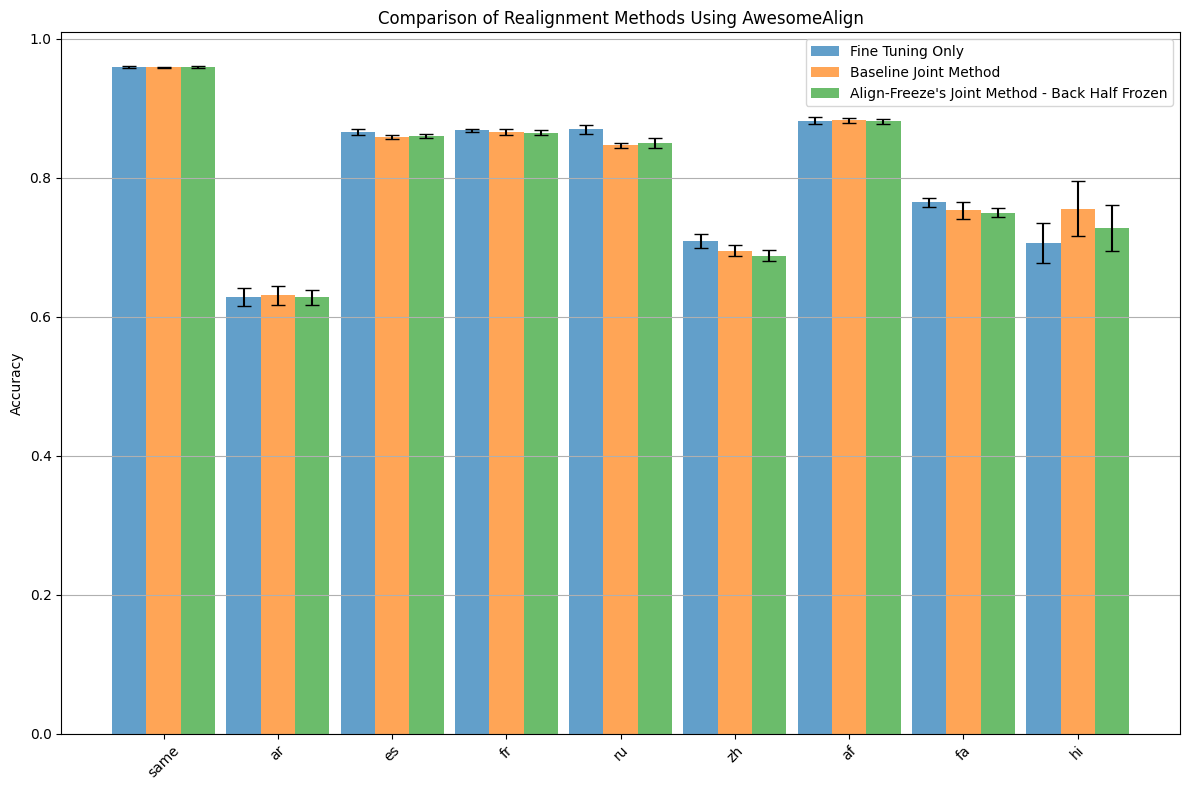

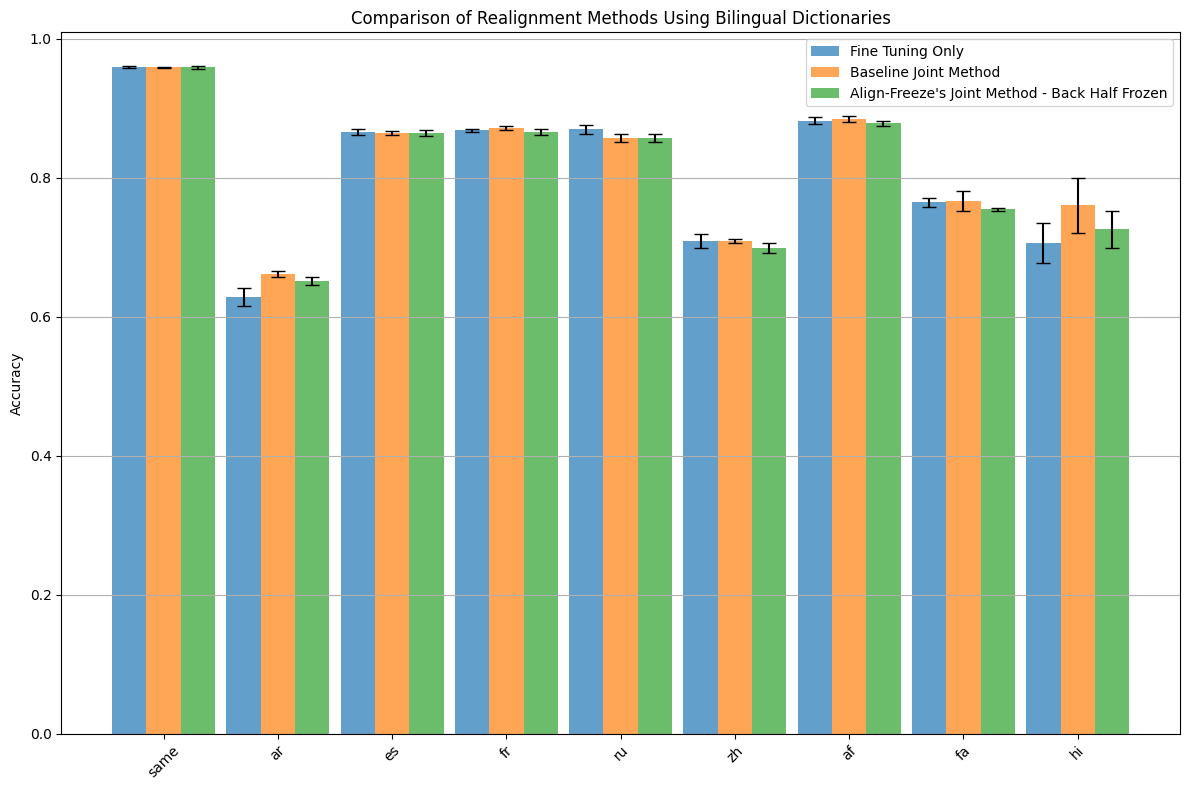

In [3]:

project_pairs = [
    ("3nl_during_fastalign_udpos", "3nl_during_partial_freeze_back_fastalign_udpos"),
    ("3nl_during_awesome_udpos", "3nl_during_partial_freeze_back_awesome_udpos"),
    ("3nl_during_dico_udpos", "3nl_during_partial_freeze_back_dico_udpos"),
]


for baseline_project, freezing_project in project_pairs:
    baseline_data = fetch_and_process_runs(baseline_project)
    freezing_data = fetch_and_process_runs(freezing_project)

    plot_comparison(baseline_project_data, baseline_data, freezing_data, langs, 'Fine Tuning Only', baseline_project, freezing_project, 'Fine Tuning Only', "Baseline Joint Method", "Align-Freeze's Joint Method - Back Half Frozen")

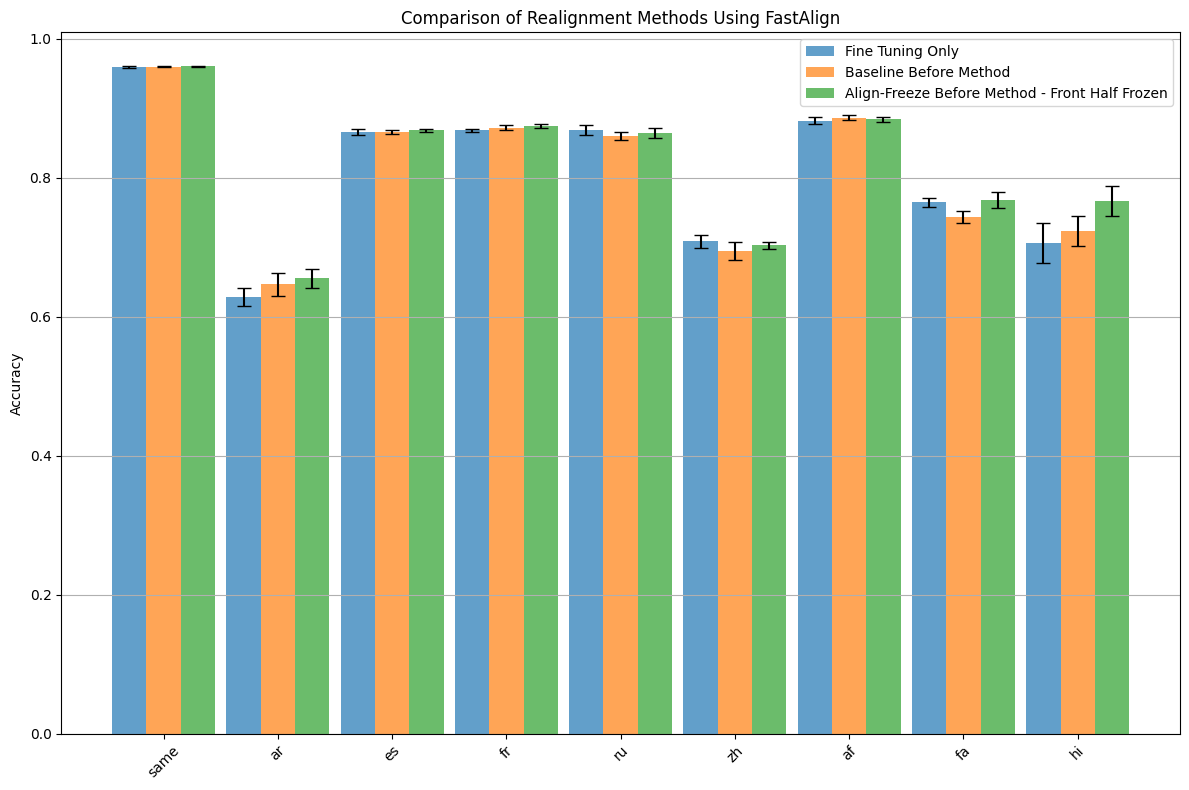

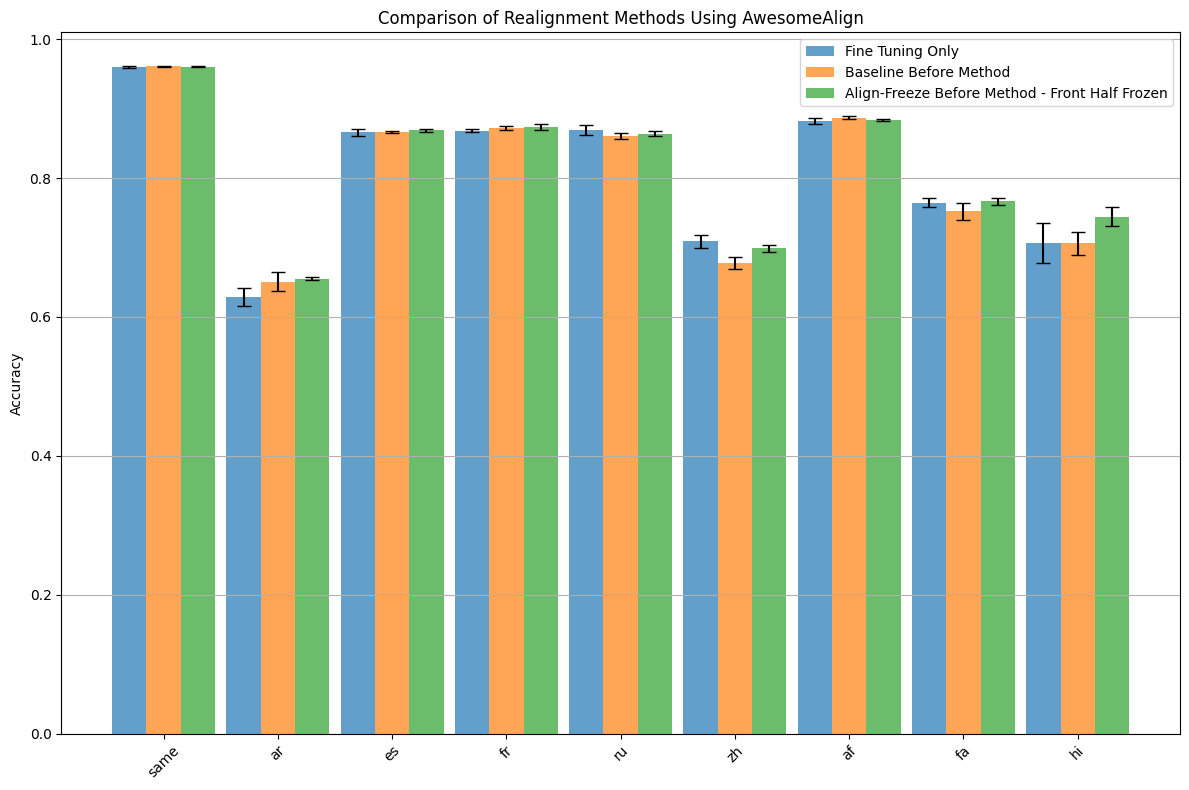

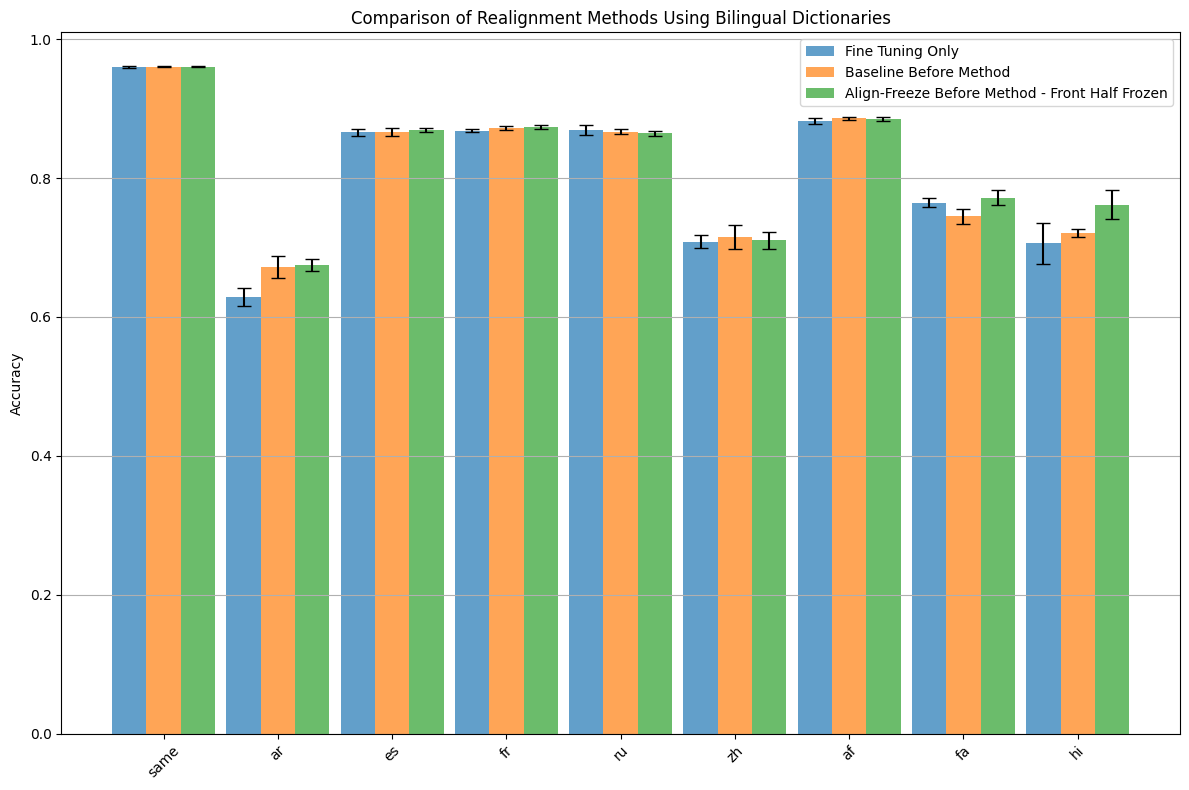

In [4]:

project_pairs = [
    ("3nl_before_fastalign_udpos", "3nl_freeze_realign_unfreeze_fastalign_udpos"),
    ("3nl_before_awesome_udpos", "3nl_freeze_realign_unfreeze_awesome_udpos"),
    ("3nl_before_dico_udpos", "3nl_freeze_realign_unfreeze_dico_udpos"),
]


for baseline_project, freezing_project in project_pairs:
    baseline_data = fetch_and_process_runs(baseline_project)
    freezing_data = fetch_and_process_runs(freezing_project)

    plot_comparison(baseline_project_data, baseline_data, freezing_data, langs, 'Fine Tuning Only', baseline_project, freezing_project, 'Fine Tuning Only', "Baseline Before Method", "Align-Freeze Before Method - Front Half Frozen")

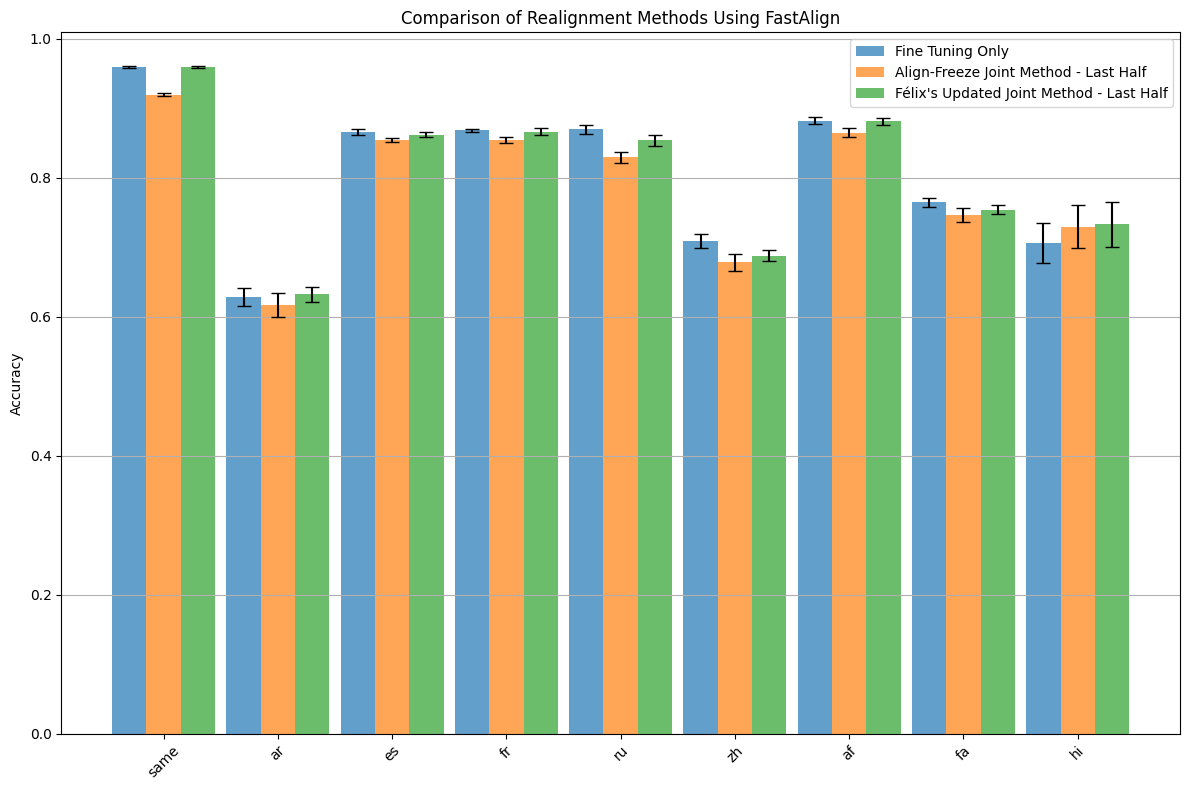

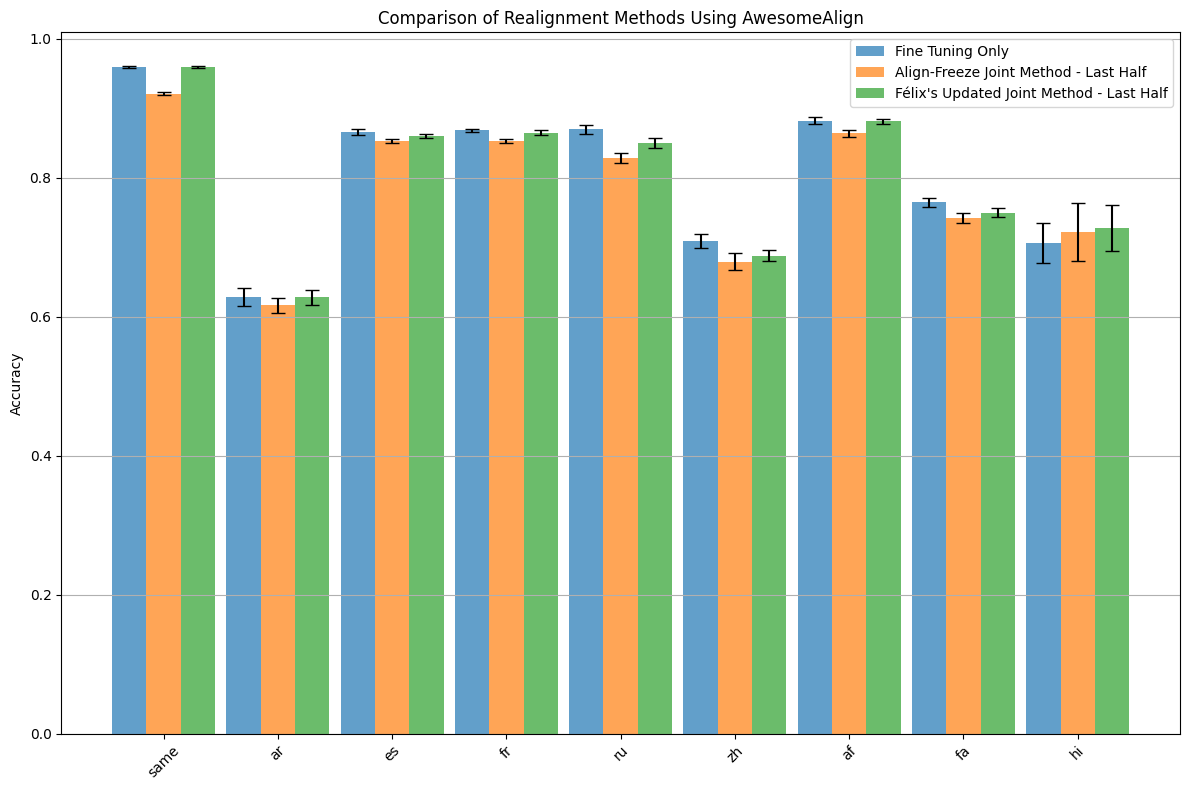

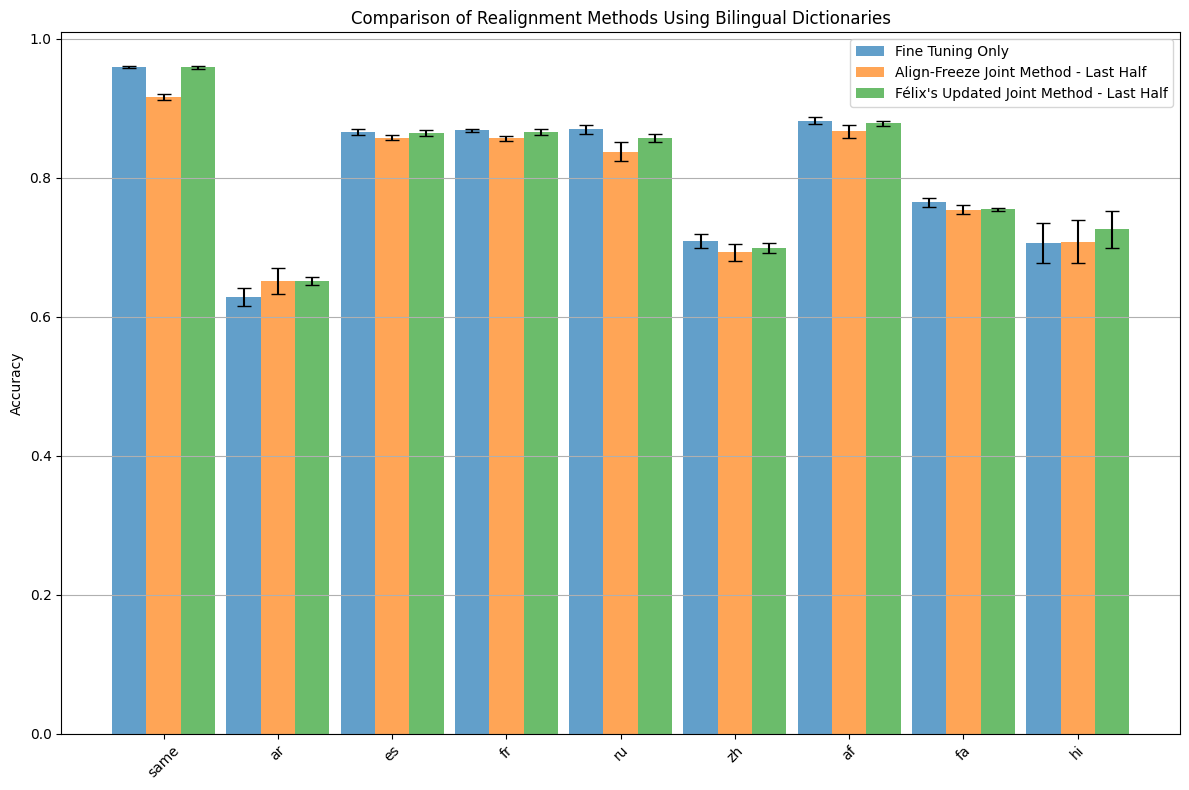

In [5]:

project_pairs = [
    ("3nl_during_freeze_realign_unfreeze_last_6_fastalign_udpos", "3nl_during_partial_freeze_back_fastalign_udpos"),
    ("3nl_during_freeze_realign_unfreeze_last_6_awesome_udpos", "3nl_during_partial_freeze_back_awesome_udpos"),
    ("3nl_during_freeze_realign_unfreeze_last_6_dico_udpos", "3nl_during_partial_freeze_back_dico_udpos"),
]


for baseline_project, freezing_project in project_pairs:
    baseline_data = fetch_and_process_runs(baseline_project)
    freezing_data = fetch_and_process_runs(freezing_project)

    plot_comparison(baseline_project_data, baseline_data, freezing_data, langs, 'Fine Tuning Only', baseline_project, freezing_project, 'Fine Tuning Only', "Align-Freeze Joint Method - Last Half", "Félix's Updated Joint Method - Last Half")


In [6]:
import wandb
import numpy as np
import scipy.stats


api = wandb.Api()


workspace = 'align-freeze'
wb_projects = {
    'before_fastalign': 'original_before_fastalign_udpos',
    'before_awesome': 'original_before_awesome_udpos',
    'before_dico': 'original_before_dico_udpos',
    'joint_fastalign': 'original_during_fastalign_udpos',
    'joint_awesome': 'original_during_awesome_udpos',
    'joint_dico': 'original_during_dico_udpos',
}


langs = ['same', 'ar', 'es', 'fr', 'ru', 'zh']  


def fetch_wb_data(projects, languages):
    wb_results = {strategy: {lang: None for lang in languages} for strategy in projects}
    for strategy, project_name in projects.items():
        for lang in languages:
            runs = api.runs(f'{workspace}/{project_name}')
            lang_values = []
            for run in runs:
                value = run.summary.get(f'eval_{lang}_accuracy')
                if value is not None:
                    lang_values.append(value * 100)  
            if lang_values:
                mean = np.mean(lang_values)
                ci = scipy.stats.sem(lang_values) * scipy.stats.t.ppf((1 + 0.95) / 2, len(lang_values)-1)
                wb_results[strategy][lang] = (mean, ci)
            else:
                wb_results[strategy][lang] = (None, None)
    return wb_results

wb_matrix = fetch_wb_data(wb_projects, langs)


paper_results = {
    'before_fastalign': {'en': (95.9, 0.1), 'ar': (64.2, 0.7), 'es': (86.7, 0.1), 'fr': (87.3, 0.1), 'ru': (86.2, 0.6), 'zh': (68.5, 0.7)},
    'before_awesome':   {'en': (96.0, 0.1), 'ar': (64.9, 1.5), 'es': (86.8, 0.1), 'fr': (87.2, 0.1), 'ru': (86.3, 0.7), 'zh': (68.0, 0.7)},
    'before_dico':      {'en': (96.0, 0.1), 'ar': (67.3, 1.5), 'es': (86.9, 0.2), 'fr': (87.3, 0.1), 'ru': (86.8, 0.7), 'zh': (71.2, 0.6)},
    'joint_fastalign':  {'en': (95.9, 0.1), 'ar': (63.5, 0.4), 'es': (86.6, 0.2), 'fr': (86.6, 0.2), 'ru': (86.4, 0.2), 'zh': (69.1, 0.5)},
    'joint_awesome':    {'en': (96.0, 0.1), 'ar': (63.1, 0.7), 'es': (85.8, 0.1), 'fr': (86.4, 0.1), 'ru': (84.5, 0.3), 'zh': (69.2, 0.2)},
    'joint_dico':       {'en': (95.9, 0.1), 'ar': (66.6, 0.4), 'es': (86.6, 0.2), 'fr': (87.2, 0.1), 'ru': (86.0, 0.3), 'zh': (70.6, 0.2)}
}


print("Comparison of Weights & Biases results with paper results:")
for strategy in wb_matrix:
    print(f"\nStrategy: {strategy}")
    for lang in langs:
        paper_lang = 'en' if lang == 'same' else lang  
        paper_mean, paper_ci = paper_results[strategy].get(paper_lang, (None, None))
        wb_mean, wb_ci = wb_matrix[strategy].get(lang, (None, None))
        if wb_mean is not None and paper_mean is not None:
            
            disagreement = '*' if (paper_mean < wb_mean - wb_ci or paper_mean > wb_mean + wb_ci) else ''
            print(f"Language: {lang} (paper 'en'), Paper: {paper_mean:.2f} ± {paper_ci:.2f}, Weights & Biases: {wb_mean:.2f} ± {wb_ci:.2f}{disagreement}")
        else:
            print(f"Language: {lang} (paper 'en'), Paper: {paper_mean if paper_mean is not None else 'No data'}, Weights & Biases: {'No data' if wb_mean is None else f'{wb_mean:.2f} ± {wb_ci:.2f}'}")
    print('\n')


Comparison of Weights & Biases results with paper results:

Strategy: before_fastalign
Language: same (paper 'en'), Paper: 95.90 ± 0.10, Weights & Biases: 95.90 ± 0.04
Language: ar (paper 'en'), Paper: 64.20 ± 0.70, Weights & Biases: 64.16 ± 1.57
Language: es (paper 'en'), Paper: 86.70 ± 0.10, Weights & Biases: 86.55 ± 0.35
Language: fr (paper 'en'), Paper: 87.30 ± 0.10, Weights & Biases: 87.13 ± 0.34
Language: ru (paper 'en'), Paper: 86.20 ± 0.60, Weights & Biases: 86.03 ± 0.87
Language: zh (paper 'en'), Paper: 68.50 ± 0.70, Weights & Biases: 69.02 ± 0.96



Strategy: before_awesome
Language: same (paper 'en'), Paper: 96.00 ± 0.10, Weights & Biases: 96.07 ± 0.05*
Language: ar (paper 'en'), Paper: 64.90 ± 1.50, Weights & Biases: 64.35 ± 1.53
Language: es (paper 'en'), Paper: 86.80 ± 0.10, Weights & Biases: 86.60 ± 0.26
Language: fr (paper 'en'), Paper: 87.20 ± 0.10, Weights & Biases: 87.07 ± 0.30
Language: ru (paper 'en'), Paper: 86.30 ± 0.70, Weights & Biases: 86.01 ± 0.94
Language: z

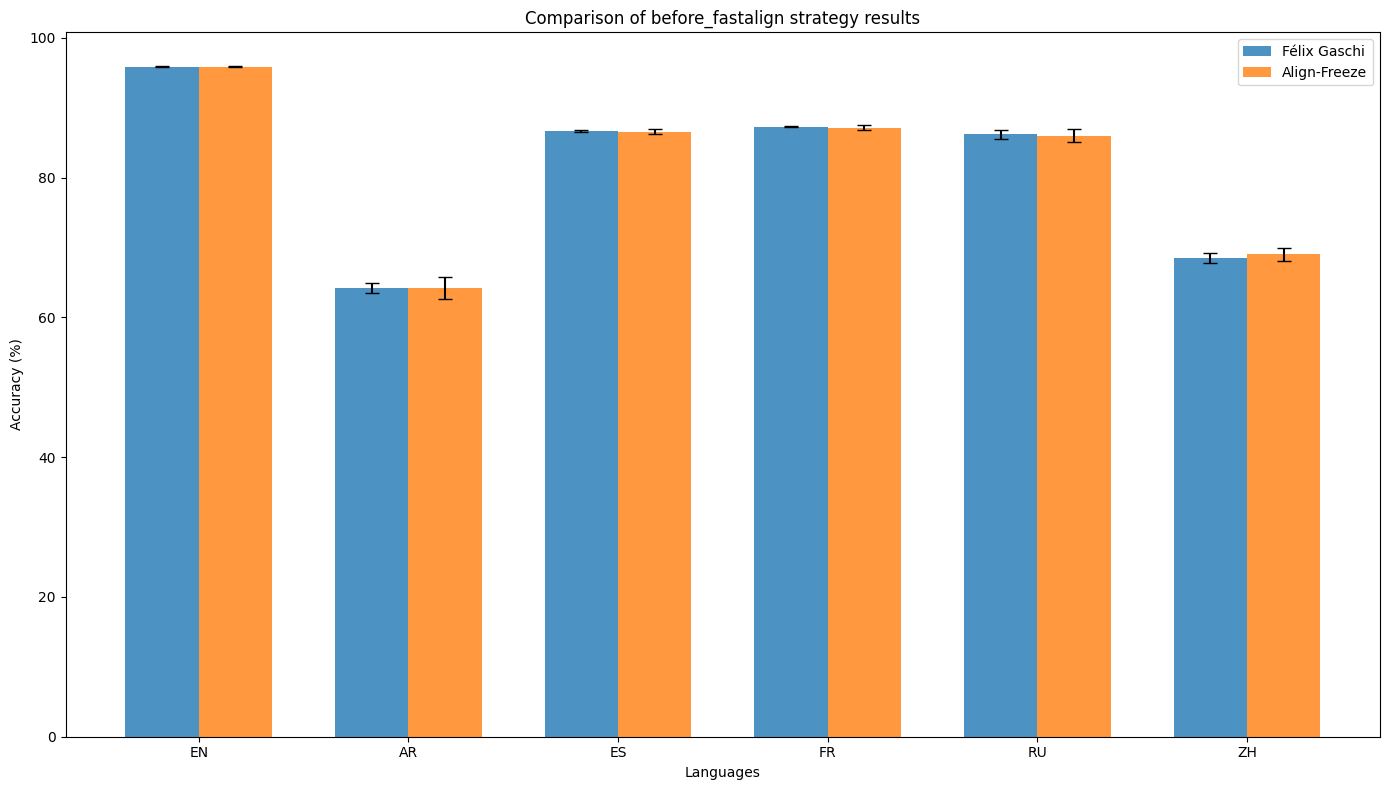

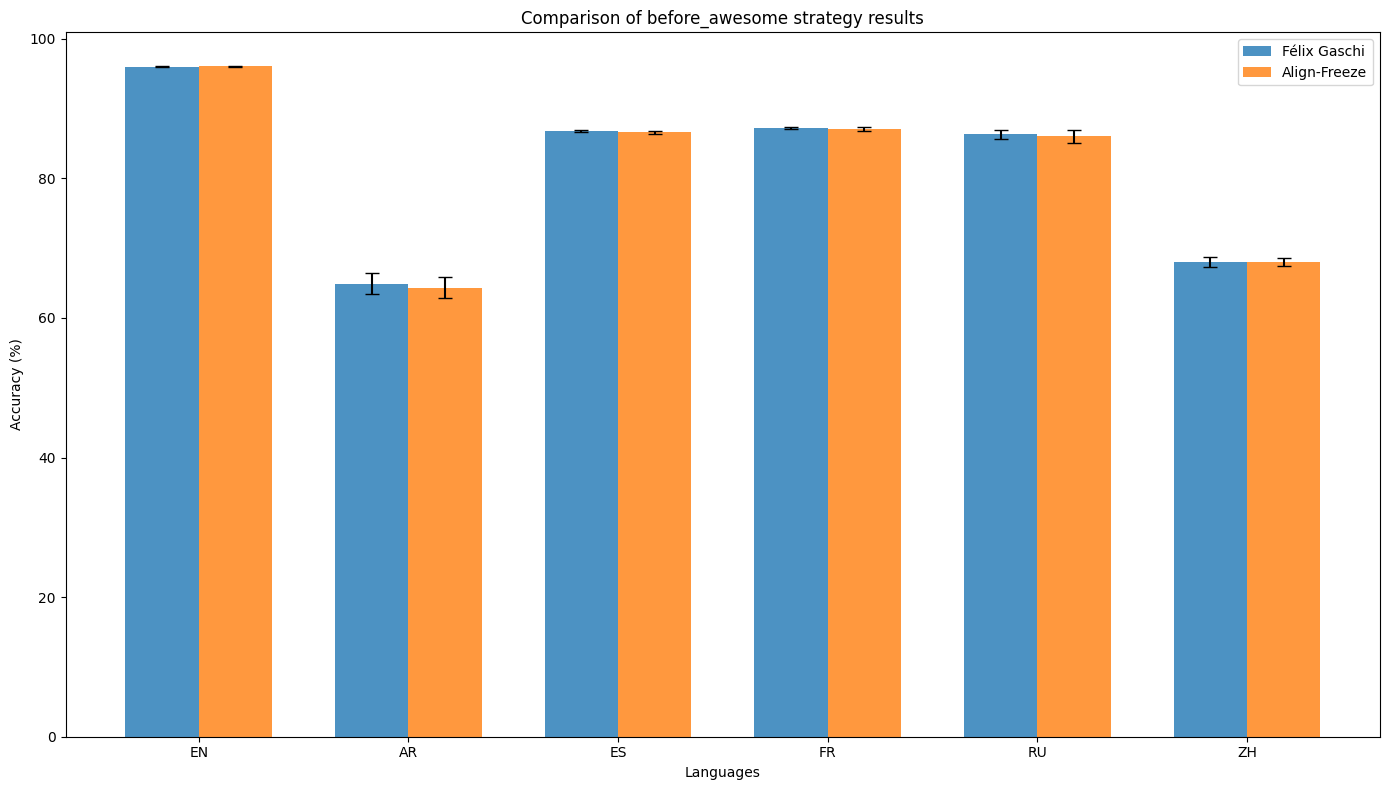

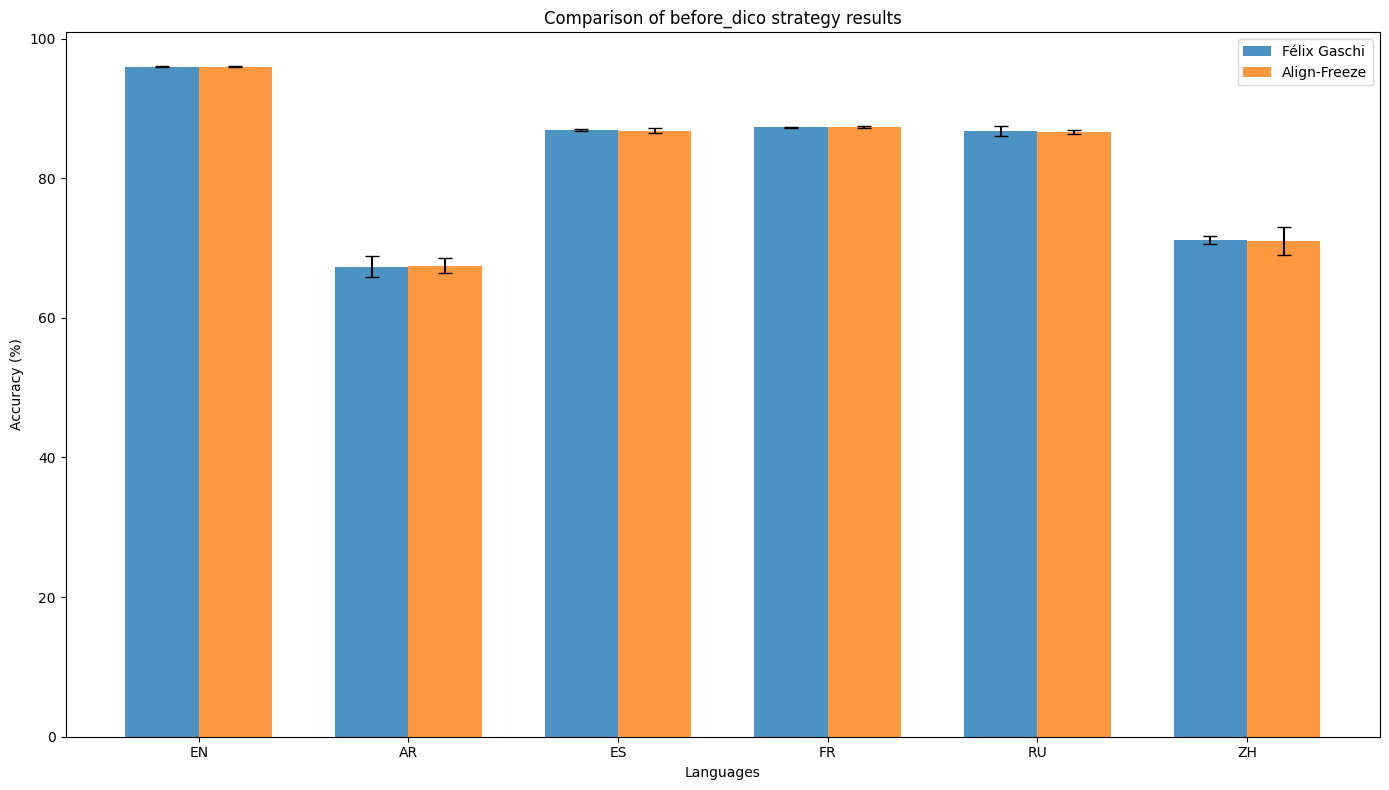

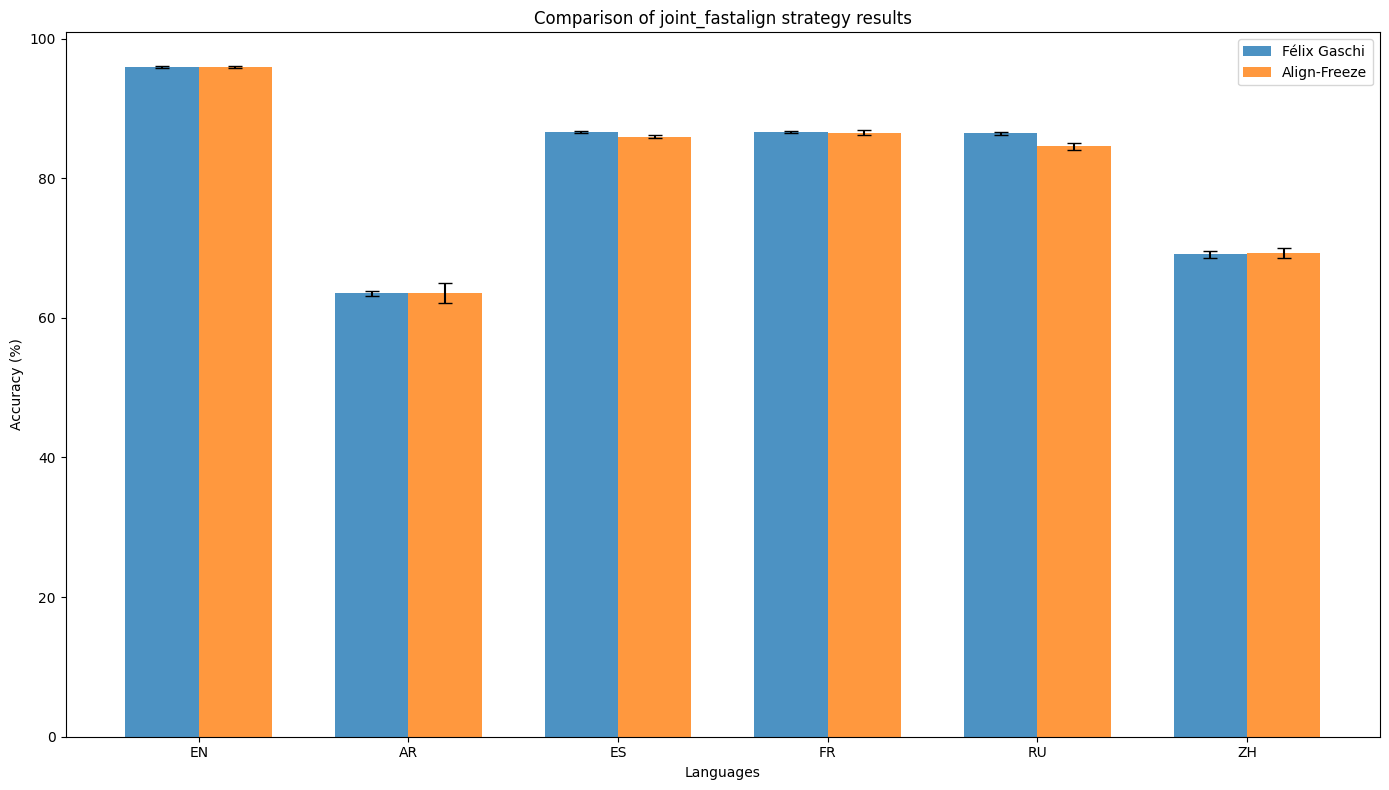

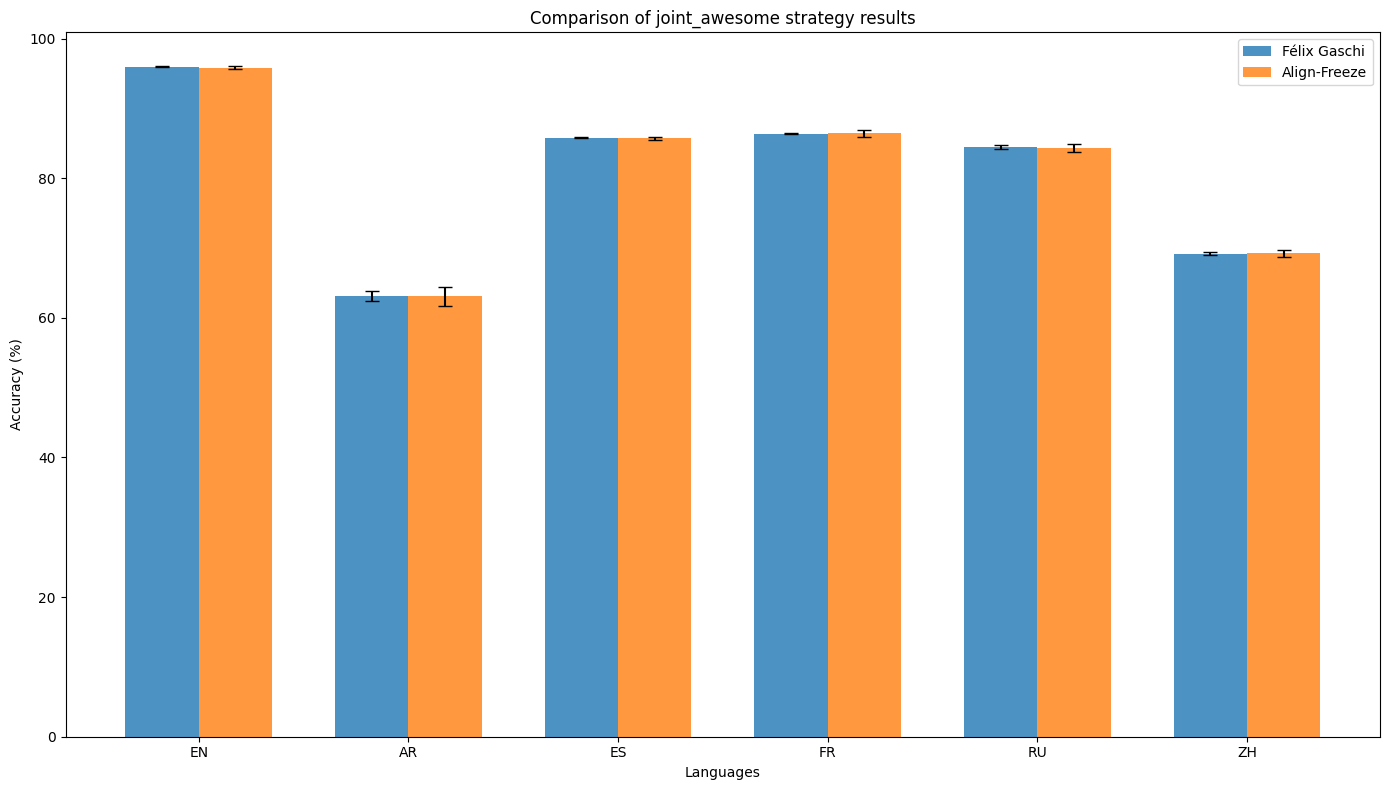

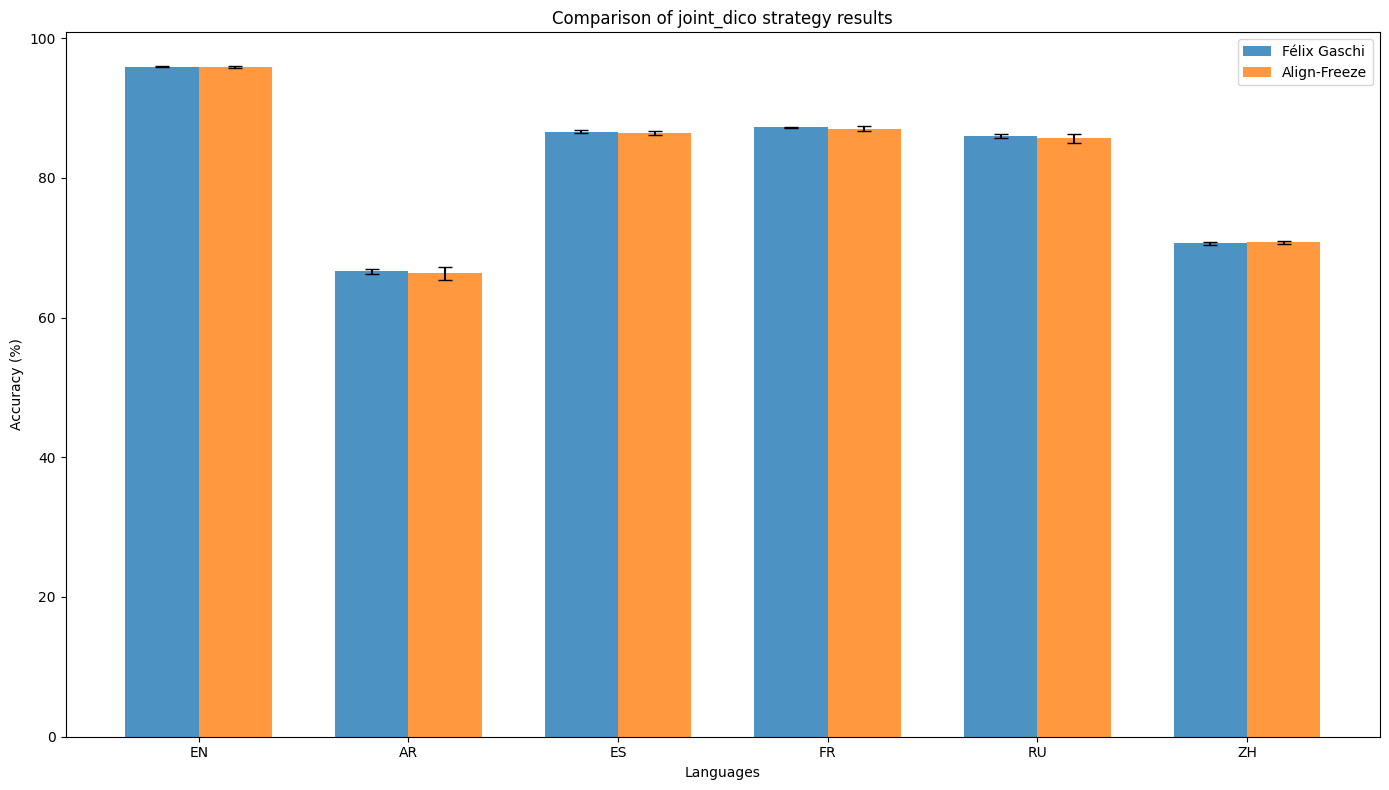

In [9]:
import matplotlib.pyplot as plt
import numpy as np


strategies = ['before_fastalign', 'before_awesome', 'before_dico', 'joint_fastalign', 'joint_awesome', 'joint_dico']
langs = ['same', 'ar', 'es', 'fr', 'ru', 'zh']  
bar_width = 0.35
opacity = 0.8

for strategy in strategies:
    fig, ax = plt.subplots(figsize=(14, 8))

    
    index = np.arange(len(langs))

    
    wb_means = [wb_matrix[strategy][lang][0] if wb_matrix[strategy][lang] is not None else 0 for lang in langs]
    wb_cis = [wb_matrix[strategy][lang][1] if wb_matrix[strategy][lang] is not None else 0 for lang in langs]

    
    paper_means = [paper_results[strategy]['en'][0] if lang == 'same' else paper_results[strategy][lang][0] for lang in langs]
    paper_cis = [paper_results[strategy]['en'][1] if lang == 'same' else paper_results[strategy][lang][1] for lang in langs]

    
    rects1 = ax.bar(index, paper_means, bar_width, alpha=opacity,  yerr=paper_cis, label='Félix Gaschi', capsize=5)
    rects2 = ax.bar(index + bar_width, wb_means, bar_width, alpha=opacity,  yerr=wb_cis, label='Align-Freeze', capsize=5)

    
    ax.set_xlabel('Languages')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(f'Comparison of {strategy} strategy results')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(['EN' if lang == 'same' else lang.upper() for lang in langs])
    ax.legend()

    
    plt.tight_layout()
    plt.show()


C:\Users\alith\AppData\Local\Temp\ipykernel_83224\2583609775.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['EN' if lang == 'same' else lang.upper() for lang in langs])


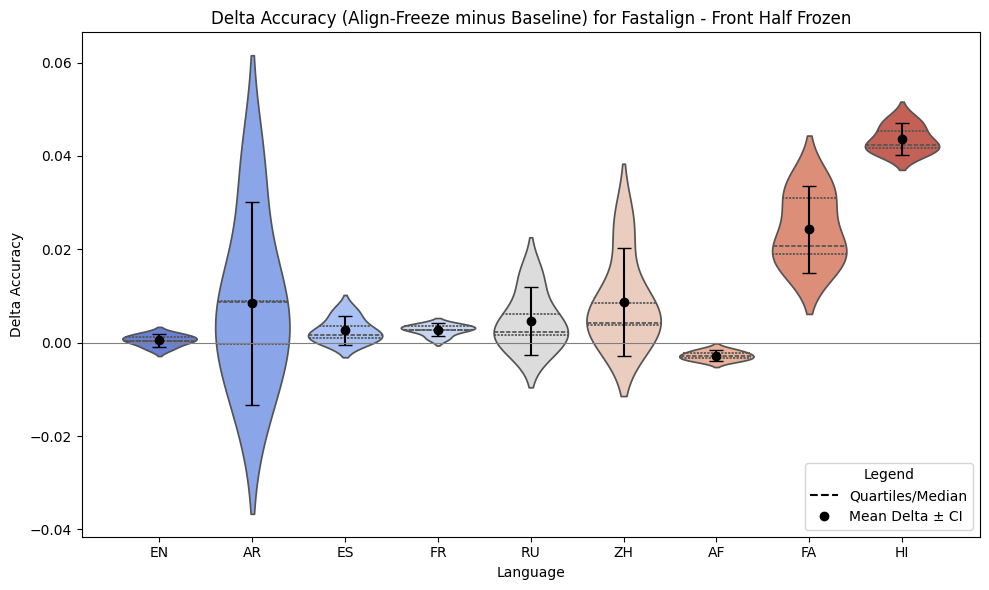

C:\Users\alith\AppData\Local\Temp\ipykernel_83224\2583609775.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['EN' if lang == 'same' else lang.upper() for lang in langs])


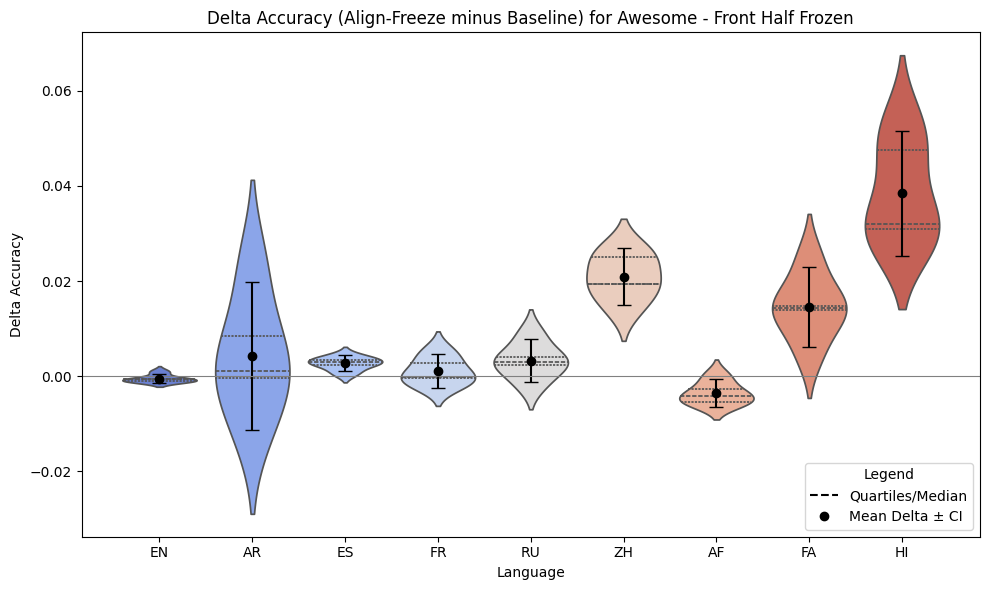

C:\Users\alith\AppData\Local\Temp\ipykernel_83224\2583609775.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['EN' if lang == 'same' else lang.upper() for lang in langs])


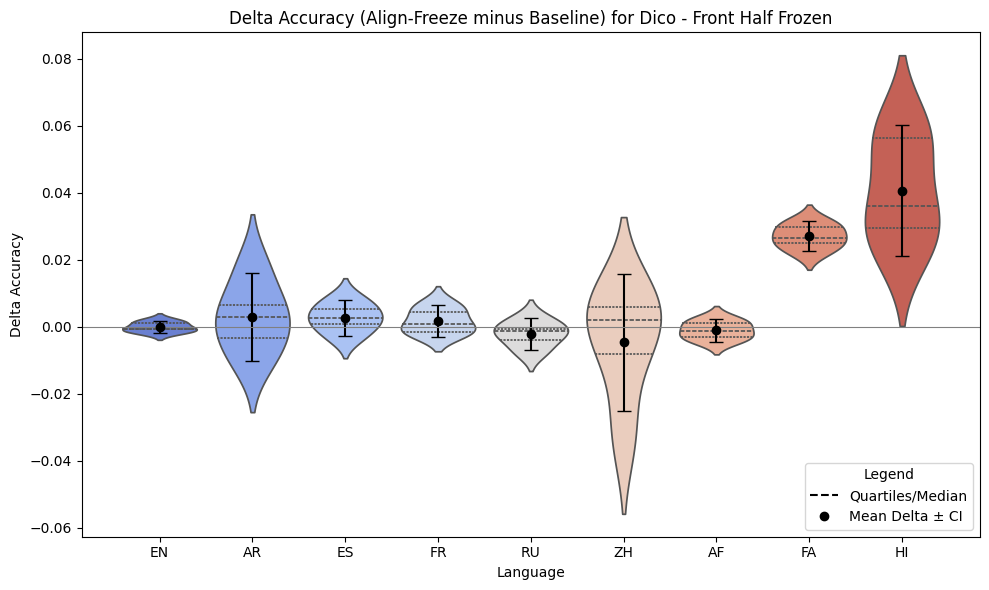

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.lines as mlines



def plot_individual_violin_deltas_with_cis(project_pairs, langs):
    for baseline_project, align_freeze_project in project_pairs:
        
        baseline_data = fetch_and_process_runs(baseline_project)
        align_freeze_data = fetch_and_process_runs(align_freeze_project)

        
        delta_data = []

        
        for lang in langs:
            lang_deltas = [align_freeze - baseline for baseline, align_freeze in zip(baseline_data[lang], align_freeze_data[lang])]
            mean_delta = np.mean(lang_deltas)
            ci = scipy.stats.sem(lang_deltas) * scipy.stats.t.ppf((1 + 0.95) / 2., len(lang_deltas)-1)
            delta_data.extend([{'Language': lang, 'Delta': delta, 'Mean Delta': mean_delta, 'CI': ci} for delta in lang_deltas])

        
        df = pd.DataFrame(delta_data)

        
        plt.figure(figsize=(10, 6))
        ax = sns.violinplot(x='Language', y='Delta', data=df, inner='quartile', palette='coolwarm', dodge=False, hue='Language')
        ax.set_xticklabels(['EN' if lang == 'same' else lang.upper() for lang in langs])

        
        
        means = df.groupby('Language')['Delta'].mean().reindex(langs)
        cis = df.groupby('Language')['CI'].mean().reindex(langs)

        
        error_bars = plt.errorbar(range(len(langs)), means, yerr=cis, fmt='o', color='black', capsize=5, label='Mean Delta ± CI')

        plt.title(f'Delta Accuracy (Align-Freeze minus Baseline) for {baseline_project.split("_")[2].capitalize()} - Front Half Frozen')
        plt.axhline(0, color='grey', linewidth=0.8)  
        plt.ylabel('Delta Accuracy')

        
        quartiles_median_line = mlines.Line2D([], [], color='black', linestyle='--', label='Quartiles/Median')
        mean_delta_ci_line = mlines.Line2D([], [], color='black', marker='o', linestyle='None', label='Mean Delta ± CI')

        
        ax.legend(handles=[quartiles_median_line, mean_delta_ci_line], loc='lower right', title="Legend")

        plt.tight_layout()
        plt.show()


project_pairs = [
    ("3nl_before_fastalign_udpos", "3nl_freeze_realign_unfreeze_fastalign_udpos"),
    ("3nl_before_awesome_udpos", "3nl_freeze_realign_unfreeze_awesome_udpos"),
    ("3nl_before_dico_udpos", "3nl_freeze_realign_unfreeze_dico_udpos"),
]
langs = ["same", "ar", "es", "fr", "ru", "zh", "af", "fa", "hi"]
plot_individual_violin_deltas_with_cis(project_pairs, langs)


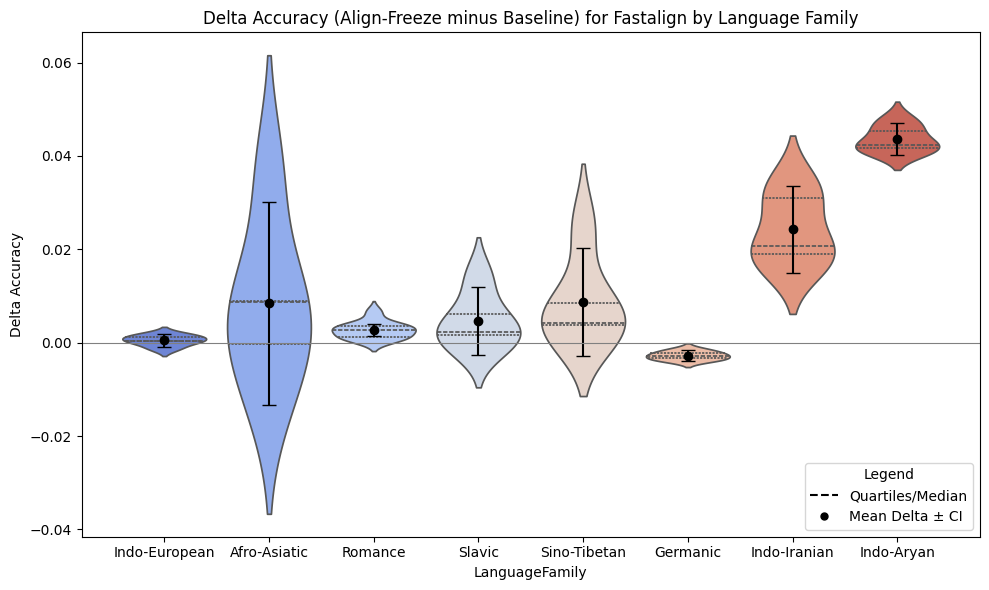

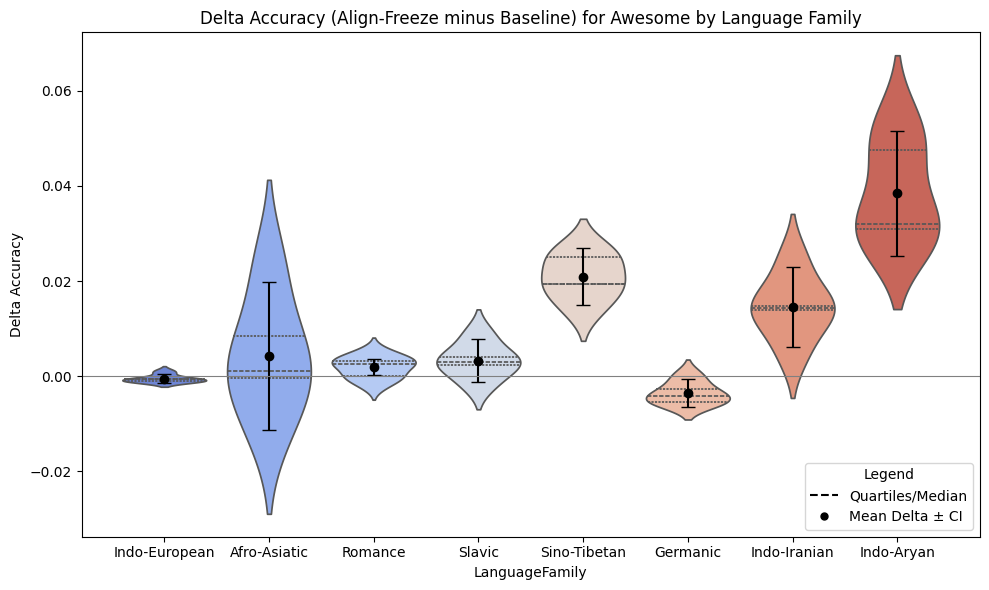

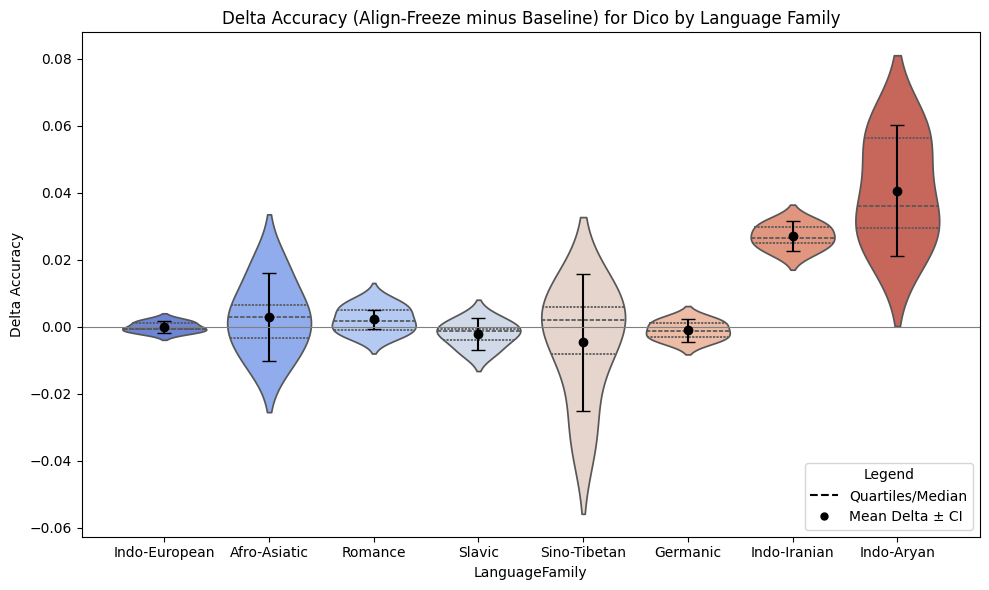

In [11]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines


language_families = {
    'same': 'Indo-European',
    'ar': 'Afro-Asiatic',
    'es': 'Romance',
    'fr': 'Romance',
    'ru': 'Slavic',
    'zh': 'Sino-Tibetan',
    'af': 'Germanic',
    'fa': 'Indo-Iranian',
    'hi': 'Indo-Aryan'
    
}


def plot_individual_violin_deltas_with_cis_by_family(project_pairs, langs, language_families):
    for baseline_project, align_freeze_project in project_pairs:
        
        baseline_data = fetch_and_process_runs(baseline_project)
        align_freeze_data = fetch_and_process_runs(align_freeze_project)

        
        delta_data = []

        
        for lang in langs:
            lang_deltas = [align_freeze - baseline for baseline, align_freeze in zip(baseline_data[lang], align_freeze_data[lang])]
            family = language_families.get(lang, 'Other')
            delta_data.extend([{'LanguageFamily': family, 'Delta': delta} for delta in lang_deltas])

        
        df = pd.DataFrame(delta_data)

        
        grouped_df = df.groupby('LanguageFamily')['Delta'].agg(['mean', 'count', 'sem']).reset_index()
        grouped_df['CI'] = grouped_df['sem'] * scipy.stats.t.ppf((1 + 0.95) / 2., grouped_df['count'] - 1)

        
        grouped_df = grouped_df.set_index('LanguageFamily').reindex(df['LanguageFamily'].unique()).reset_index()

        
        plt.figure(figsize=(10, 6))
        ax = sns.violinplot(x='LanguageFamily', y='Delta', data=df, inner='quartile', palette='coolwarm', order=grouped_df['LanguageFamily'], hue='LanguageFamily')

        
        xticks = ax.get_xticks()

        
        for xtick, (index, row) in zip(xticks, grouped_df.iterrows()):
            plt.errorbar(xtick, row['mean'], yerr=row['CI'], fmt='o', color='black', capsize=5)

        plt.title(f'Delta Accuracy (Align-Freeze minus Baseline) for {baseline_project.split("_")[2].capitalize()} by Language Family')
        plt.axhline(0, color='grey', linewidth=0.8)  
        plt.ylabel('Delta Accuracy')

        
        quartiles_median_line = mlines.Line2D([], [], color='black', linestyle='--', label='Quartiles/Median')
        mean_delta_ci_line = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Mean Delta ± CI')

        
        ax.legend(handles=[quartiles_median_line, mean_delta_ci_line], loc='lower right', title="Legend")

        plt.tight_layout()
        plt.show()


project_pairs = [
    ("3nl_before_fastalign_udpos", "3nl_freeze_realign_unfreeze_fastalign_udpos"),
    ("3nl_before_awesome_udpos", "3nl_freeze_realign_unfreeze_awesome_udpos"),
    ("3nl_before_dico_udpos", "3nl_freeze_realign_unfreeze_dico_udpos"),
]
langs = ["same", "ar", "es", "fr", "ru", "zh", "af", "fa", "hi"]
plot_individual_violin_deltas_with_cis_by_family(project_pairs, langs, language_families)


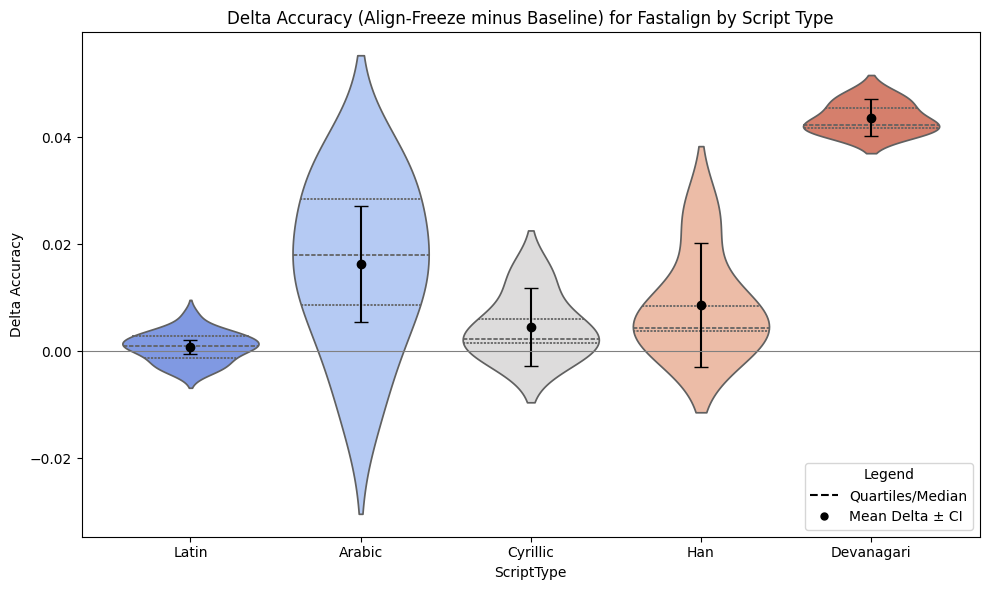

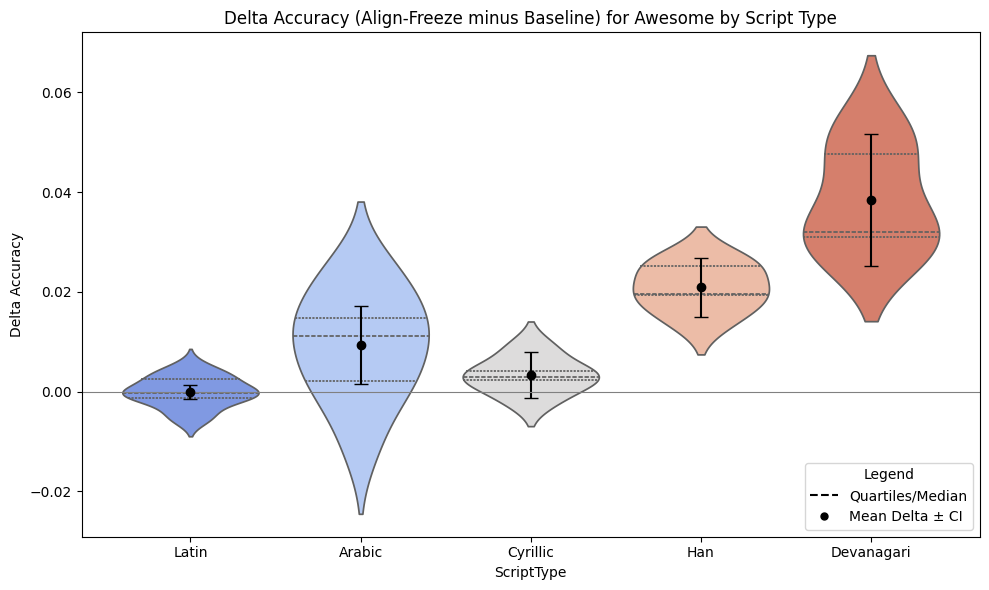

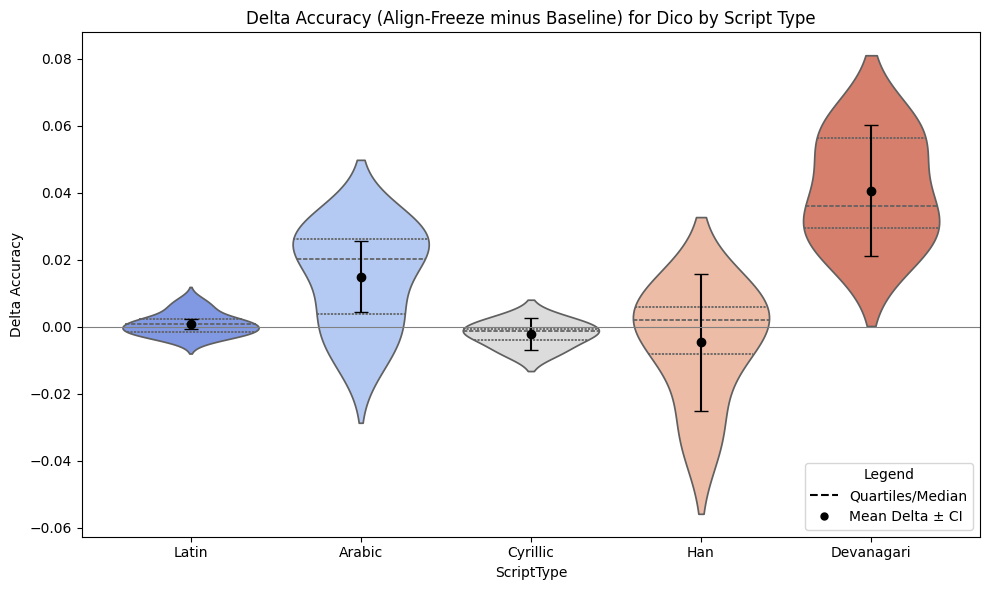

In [12]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines


script_types = {
    'same': 'Latin',  
    'ar': 'Arabic',
    'es': 'Latin',
    'fr': 'Latin',
    'ru': 'Cyrillic',
    'zh': 'Han',
    'af': 'Latin',
    'fa': 'Arabic',
    'hi': 'Devanagari'
    
}



def plot_individual_violin_deltas_with_cis_by_script(project_pairs, langs, script_types):
    for baseline_project, align_freeze_project in project_pairs:
        
        baseline_data = fetch_and_process_runs(baseline_project)
        align_freeze_data = fetch_and_process_runs(align_freeze_project)

        
        delta_data = []

        
        for lang in langs:
            lang_deltas = [align_freeze - baseline for baseline, align_freeze in zip(baseline_data[lang], align_freeze_data[lang])]
            script = script_types.get(lang, 'Other')
            delta_data.extend([{'ScriptType': script, 'Delta': delta} for delta in lang_deltas])

        
        df = pd.DataFrame(delta_data)

        
        plt.figure(figsize=(10, 6))
        ax = sns.violinplot(x='ScriptType', y='Delta', data=df, inner='quartile', palette='coolwarm', hue='ScriptType')

        
        script_groups = df.groupby('ScriptType')['Delta']
        for script, group in script_groups:
            mean = group.mean()
            ci = scipy.stats.sem(group) * scipy.stats.t.ppf((1 + 0.95) / 2., len(group)-1)
            x = df['ScriptType'].unique().tolist().index(script)  
            plt.errorbar(x, mean, yerr=ci, fmt='o', color='black', capsize=5)

        plt.title(f'Delta Accuracy (Align-Freeze minus Baseline) for {baseline_project.split("_")[2].capitalize()} by Script Type')
        plt.axhline(0, color='grey', linewidth=0.8)  
        plt.ylabel('Delta Accuracy')

        
        quartiles_median_line = mlines.Line2D([], [], color='black', linestyle='--', label='Quartiles/Median')
        mean_delta_ci_line = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Mean Delta ± CI')

        
        ax.legend(handles=[quartiles_median_line, mean_delta_ci_line], loc='lower right', title="Legend")

        plt.tight_layout()
        plt.show()


project_pairs = [
    ("3nl_before_fastalign_udpos", "3nl_freeze_realign_unfreeze_fastalign_udpos"),
    ("3nl_before_awesome_udpos", "3nl_freeze_realign_unfreeze_awesome_udpos"),
    ("3nl_before_dico_udpos", "3nl_freeze_realign_unfreeze_dico_udpos"),
]
langs = ["same", "ar", "es", "fr", "ru", "zh", "af", "fa", "hi"]
plot_individual_violin_deltas_with_cis_by_script(project_pairs, langs, script_types)


In [13]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines


def plot_individual_violin_deltas_with_cis_by_grouping(project_pairs, langs, grouping, group_name):
    for baseline_project, align_freeze_project in project_pairs:
        
        baseline_data = fetch_and_process_runs(baseline_project)
        align_freeze_data = fetch_and_process_runs(align_freeze_project)

        
        delta_data = []

        
        for lang in langs:
            lang_deltas = [align_freeze - baseline for baseline, align_freeze in zip(baseline_data[lang], align_freeze_data[lang])]
            group = grouping.get(lang, 'Other')
            delta_data.extend([{'Group': group, 'Delta': delta} for delta in lang_deltas])

        
        df = pd.DataFrame(delta_data)

        
        plt.figure(figsize=(10, 6))
        ax = sns.violinplot(x='Group', y='Delta', data=df, inner='quartile', palette='coolwarm', hue='Group')

        
        group_means = df.groupby('Group')['Delta'].mean()
        group_cis = df.groupby('Group')['Delta'].apply(lambda x: scipy.stats.sem(x) * scipy.stats.t.ppf((1 + 0.95) / 2., len(x)-1))

        for i, group in enumerate(df['Group'].unique()):
            plt.errorbar(i, group_means[group], yerr=group_cis[group], fmt='o', color='black', capsize=5)

        plt.title(f'Delta Accuracy (Align-Freeze minus Baseline) for {baseline_project.split("_")[2].capitalize()} by {group_name} - Front Half Frozen')
        plt.axhline(0, color='grey', linewidth=0.8)  
        plt.ylabel('Delta Accuracy')

        
        quartiles_median_line = mlines.Line2D([], [], color='black', linestyle='--', label='Quartiles/Median')
        mean_delta_ci_line = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Mean Delta ± CI')

        
        ax.legend(handles=[quartiles_median_line, mean_delta_ci_line], loc='lower right', title="Legend")

        plt.tight_layout()
        plt.show()


project_pairs = [
    ("3nl_before_fastalign_udpos", "3nl_freeze_realign_unfreeze_fastalign_udpos"),
    ("3nl_before_awesome_udpos", "3nl_freeze_realign_unfreeze_awesome_udpos"),
    ("3nl_before_dico_udpos", "3nl_freeze_realign_unfreeze_dico_udpos"),
]
langs = ["same", "ar", "es", "fr", "ru", "zh", "af", "fa", "hi"]

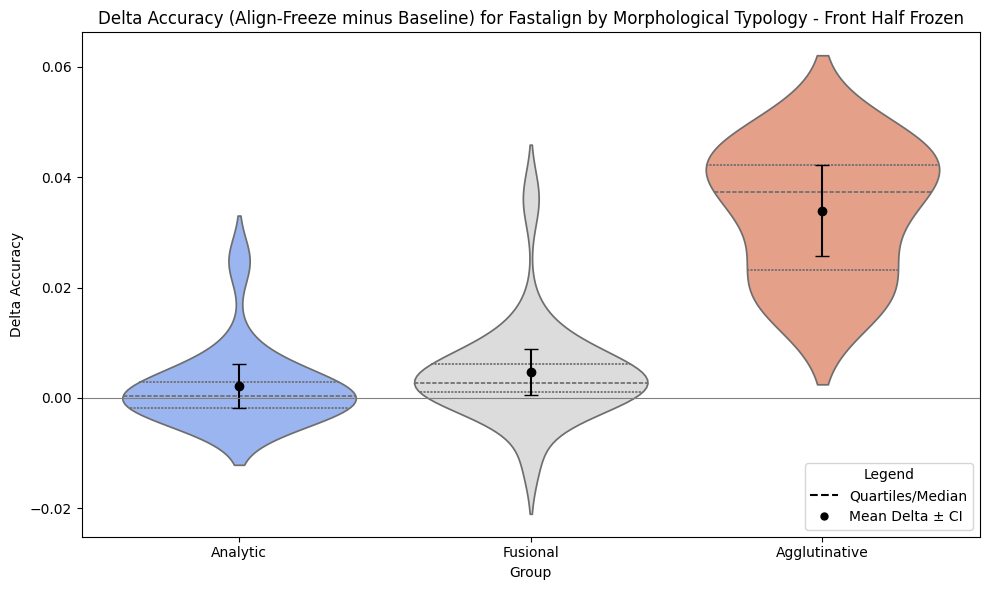

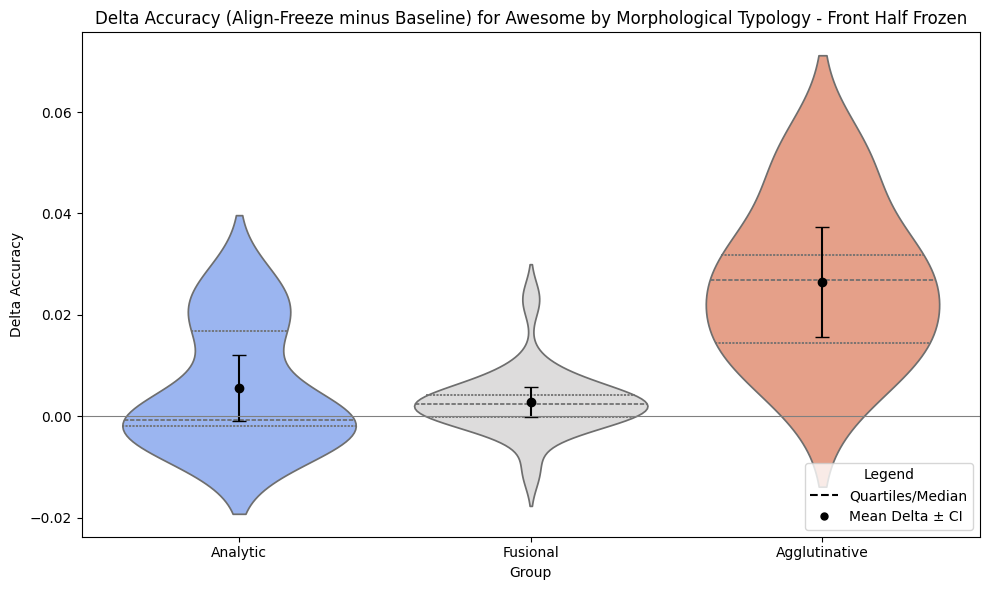

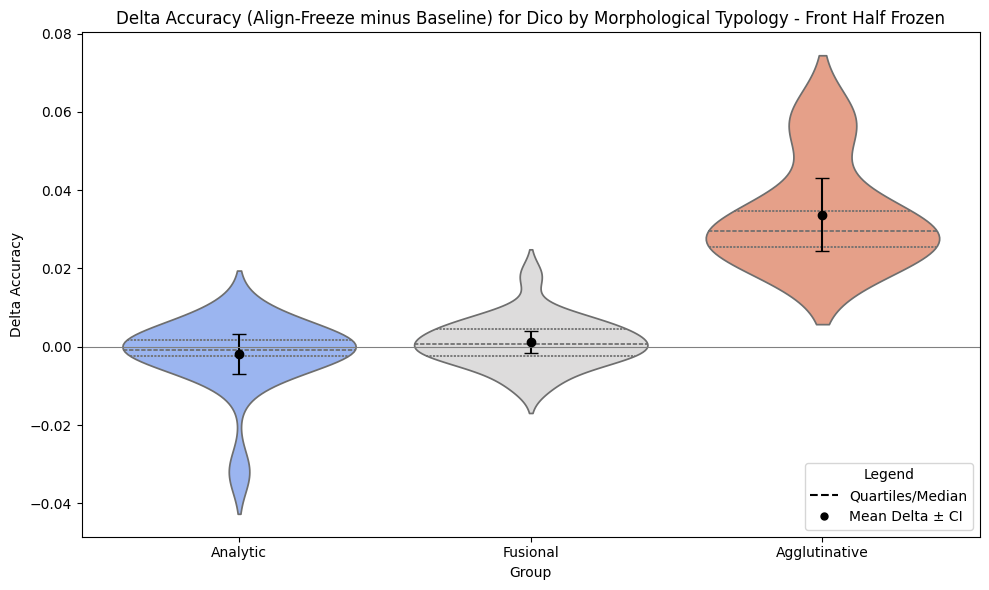

In [14]:
morphological_typology = {
    'same': 'Analytic',  
    'ar': 'Fusional',
    'es': 'Fusional',
    'fr': 'Fusional',
    'ru': 'Fusional',
    'zh': 'Analytic',
    'af': 'Analytic',
    'fa': 'Agglutinative',
    'hi': 'Agglutinative'
}

plot_individual_violin_deltas_with_cis_by_grouping(project_pairs, langs, morphological_typology, 'Morphological Typology')

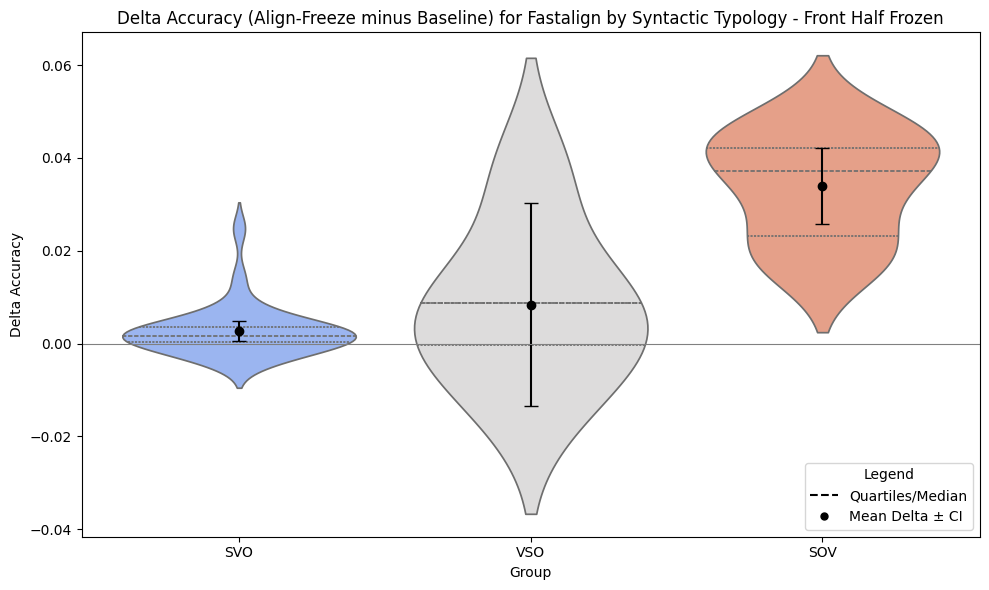

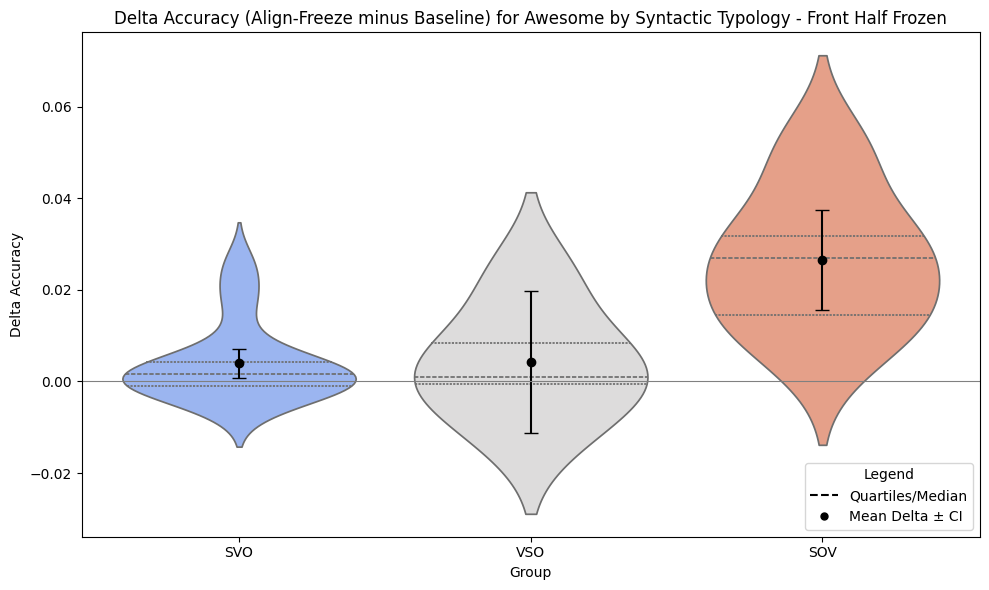

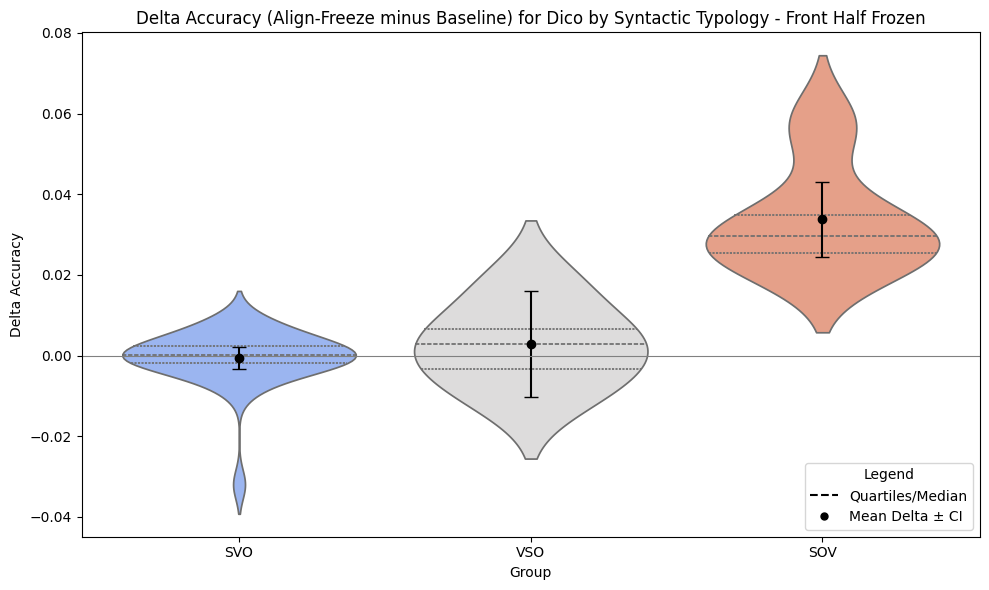

In [15]:
syntactic_typology = {
    'same': 'SVO',  
    'ar': 'VSO',
    'es': 'SVO',
    'fr': 'SVO',
    'ru': 'SVO',
    'zh': 'SVO',
    'af': 'SVO',
    'fa': 'SOV',
    'hi': 'SOV'
}

plot_individual_violin_deltas_with_cis_by_grouping(project_pairs, langs, syntactic_typology, 'Syntactic Typology')

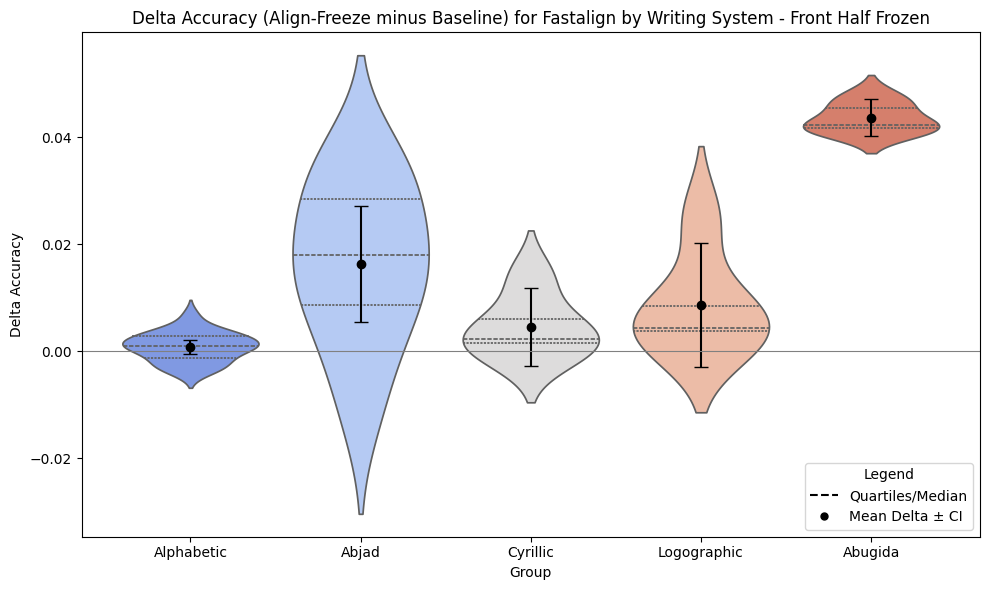

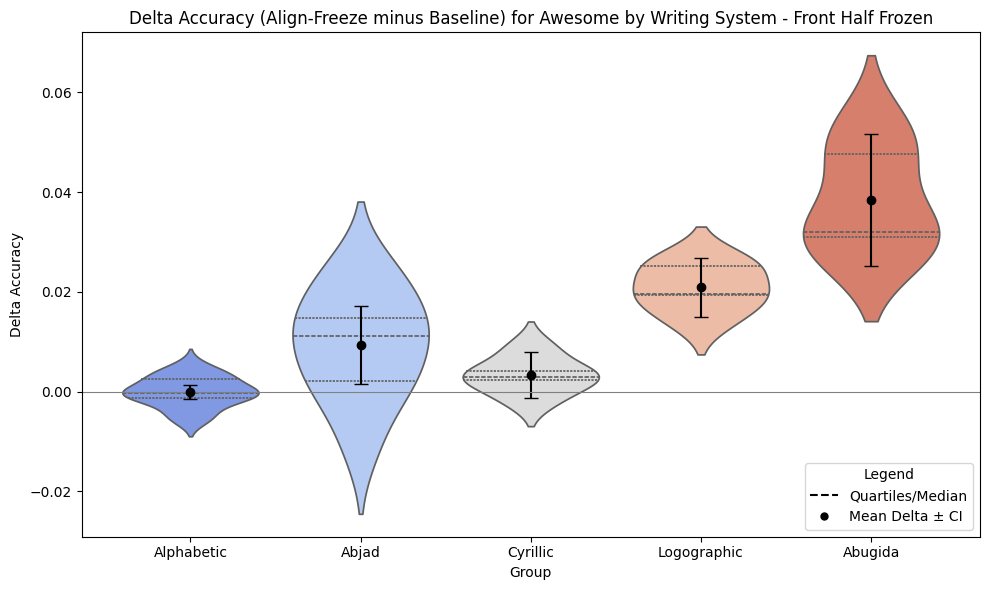

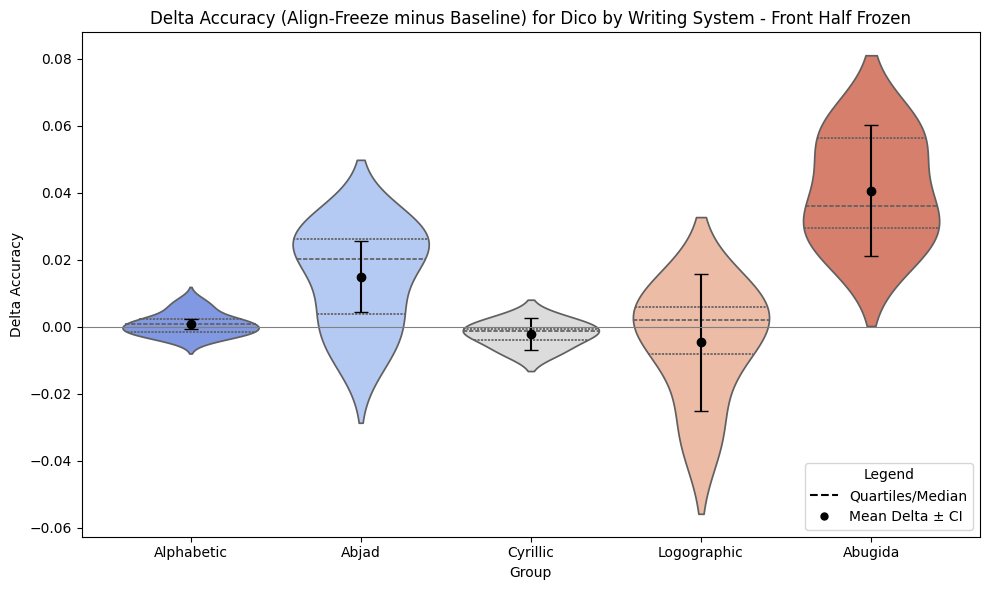

In [16]:
writing_system = {
    'same': 'Alphabetic',  
    'ar': 'Abjad',
    'es': 'Alphabetic',
    'fr': 'Alphabetic',
    'ru': 'Cyrillic',
    'zh': 'Logographic',
    'af': 'Alphabetic',
    'fa': 'Abjad',
    'hi': 'Abugida'
}

plot_individual_violin_deltas_with_cis_by_grouping(project_pairs, langs, writing_system, 'Writing System')

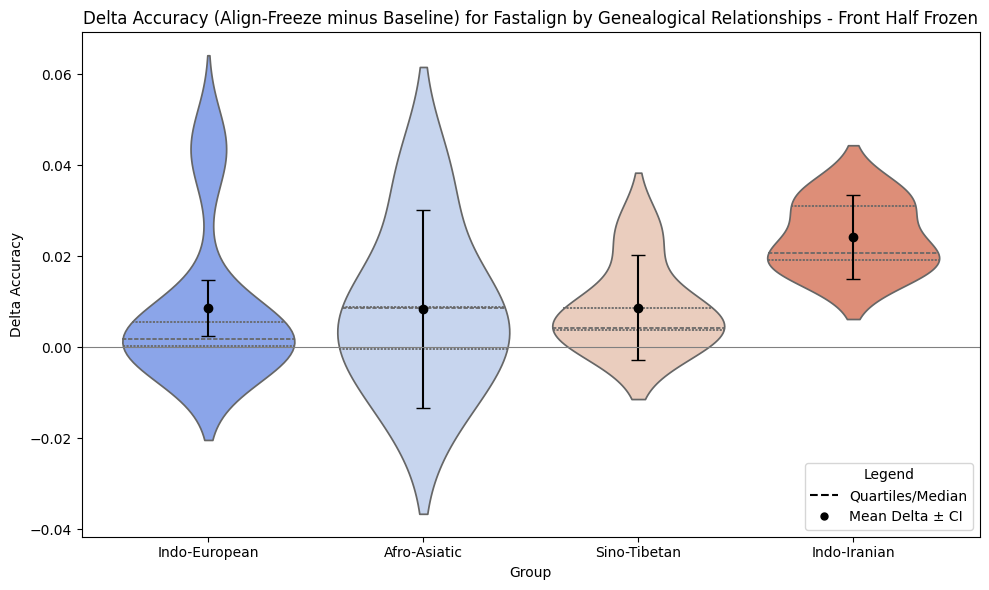

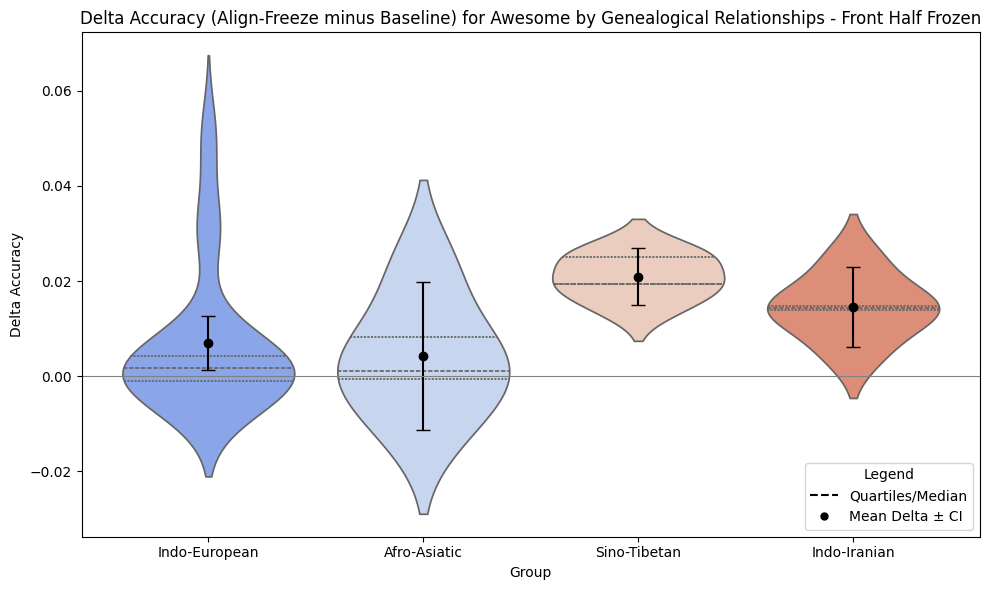

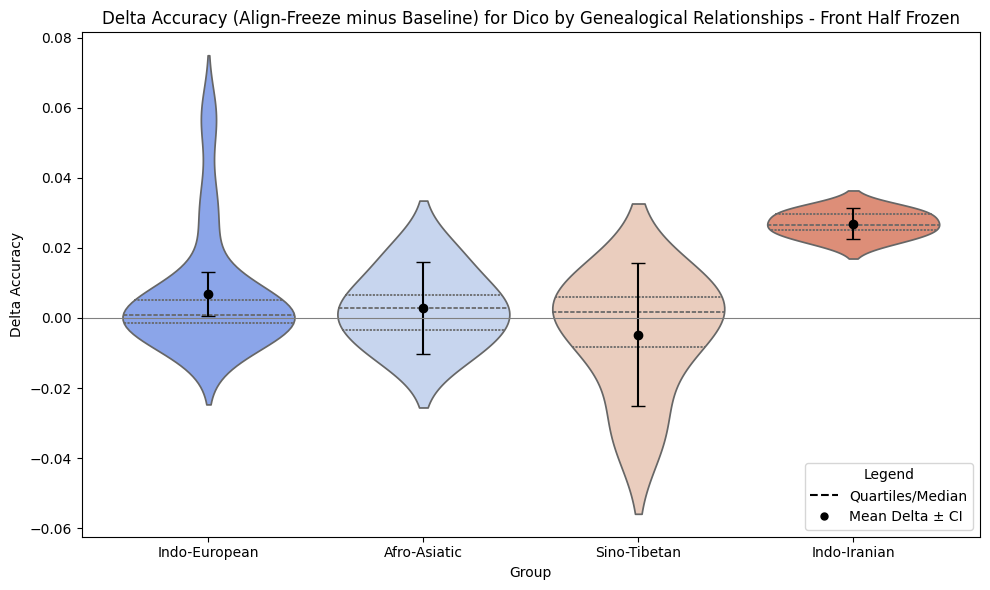

In [17]:
genealogical_relationships = {
    'same': 'Indo-European',  
    'ar': 'Afro-Asiatic',
    'es': 'Indo-European',
    'fr': 'Indo-European',
    'ru': 'Indo-European',
    'zh': 'Sino-Tibetan',
    'af': 'Indo-European',
    'fa': 'Indo-Iranian',
    'hi': 'Indo-European'
}

plot_individual_violin_deltas_with_cis_by_grouping(project_pairs, langs, genealogical_relationships, 'Genealogical Relationships')

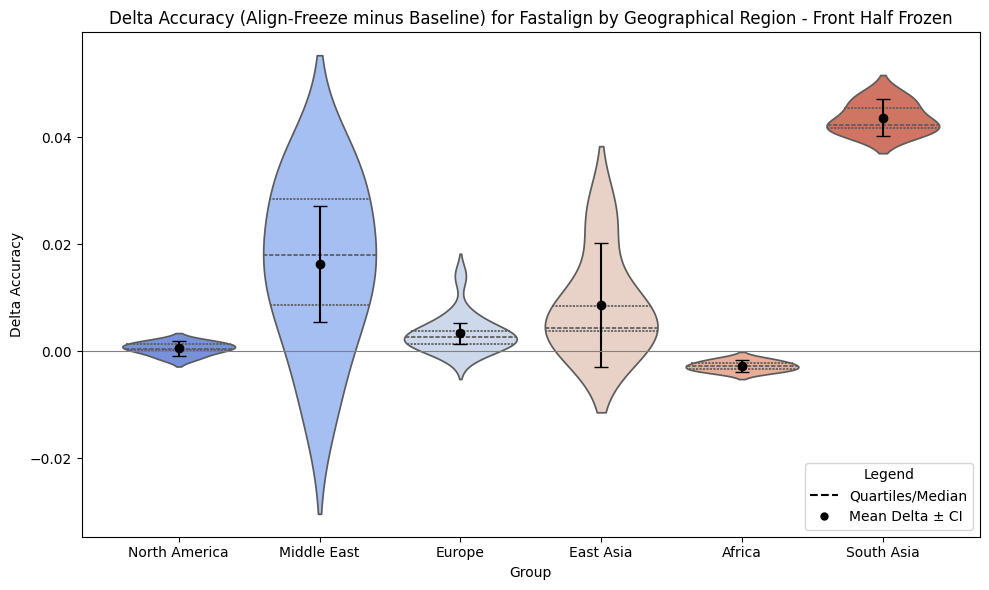

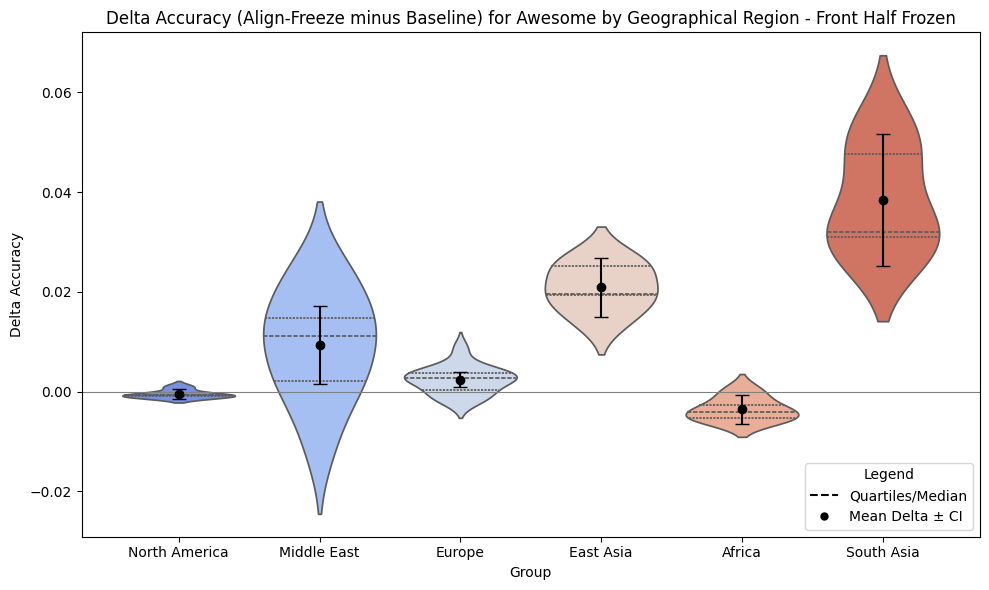

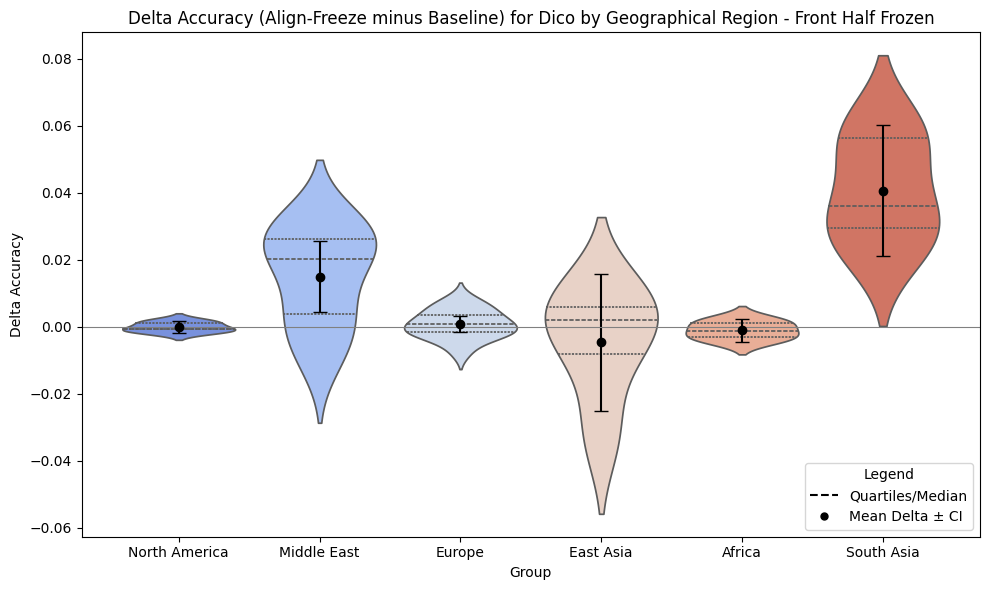

In [18]:
geographical_region = {
    'same': 'North America',  
    'ar': 'Middle East',
    'es': 'Europe',  
    'fr': 'Europe',
    'ru': 'Europe',
    'zh': 'East Asia',
    'af': 'Africa',
    'fa': 'Middle East',
    'hi': 'South Asia'
}

plot_individual_violin_deltas_with_cis_by_grouping(project_pairs, langs, geographical_region, 'Geographical Region')